# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [59]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [60]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
#Imports metrics from
from sklearn import metrics
import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.

# **Loading the Data**

In [61]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [62]:
df_Train = pd.read_csv('Data/Train.csv') # Train Dataset
df_Test = pd.read_csv('Data/Test.csv')   # Test Dataset
pd.set_option('display.width', 300)

# **Data Overview**

In [63]:
print(df_Train.head())
print(df_Test.head())

         V1        V2        V3        V4        V5        V6        V7        V8        V9       V10  ...       V32       V33        V34       V35       V36       V37       V38       V39       V40  Target
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198  6.667486  0.443809 -2.369169  2.950578 -3.480324       0
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138  5.360850  0.351993  2.940021  3.839160 -4.309402       0
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714  5.550100 -1.526796  0.13885

In [64]:
#overview of given train and test dataset for sanity and efficient model creation
data = {'Category':['Train','Test'],
               'Shape (Row * Col)': [df_Train.shape,df_Test.shape ],
               'Contains Null':[df_Train.isnull().sum().sum(),df_Test.isnull().sum().sum()],
               'Column names having Null values': [df_Train.columns[df_Train.isnull().any()].tolist(),df_Test.columns[df_Test.isnull().any()].tolist()]
       }

df_overview = pd.DataFrame(data)
df_overview

Category Shape (Row * Col)  Contains Null Column names having Null values
0    Train       (20000, 41)             36                        [V1, V2]
1     Test        (5000, 41)             11                        [V1, V2]

In [65]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [66]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [67]:
df_Train.describe().T

count      mean       std        min       25%       50%       75%        max
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112  15.493002
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967  13.089269
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165  17.090919
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615  13.236381
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   8.133797
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   6.975847
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   8.006091
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965  11.679495
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   8.137580
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   8.108472
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906  11.826433
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454  15.080698
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886  15.419616
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   5.670664
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052  12.246455
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046  13.583212
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751  16.756432
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770  13.179863
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299  13.237742
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372  16.052339
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884  13.840473
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   7.409856
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750  14.458734
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975  17.163291
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   8.223389
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037  16.836410
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177  17.560404
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   6.527643
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773  10.722055
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229  12.505812
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688  17.255090
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722  23.633187
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134  16.692486
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935  14.358213
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358  15.291065
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939  19.329576
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   7.467006
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399  15.289923
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   7.759877
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897  10.654265
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   1.000000

In [68]:
df_Test.describe().T

count      mean       std        min       25%       50%       75%        max
V1      4995.0 -0.277622  3.466280 -12.381696 -2.743691 -0.764767  1.831313  13.504352
V2      4994.0  0.397928  3.139562 -10.716179 -1.649211  0.427369  2.444486  14.079073
V3      5000.0  2.551787  3.326607  -9.237940  0.314931  2.260428  4.587000  15.314503
V4      5000.0 -0.048943  3.413937 -14.682446 -2.292694 -0.145753  2.166468  12.140157
V5      5000.0 -0.080120  2.110870  -7.711569 -1.615238 -0.131890  1.341197   7.672835
V6      5000.0 -1.042138  2.005444  -8.924196 -2.368853 -1.048571  0.307555   5.067685
V7      5000.0 -0.907922  1.769017  -8.124230 -2.054259 -0.939695  0.212228   7.616182
V8      5000.0 -0.574592  3.331911 -12.252731 -2.642088 -0.357943  1.712896  10.414722
V9      5000.0  0.030121  2.174139  -6.785495 -1.455712 -0.079891  1.449548   8.850720
V10     5000.0  0.018524  2.145437  -8.170956 -1.353320  0.166292  1.511248   6.598728
V11     5000.0 -2.008615  3.112220 -13.151753 -4.050432 -2.043122  0.044069   9.956400
V12     5000.0  1.576413  2.907401  -8.164048 -0.449674  1.488253  3.562626  12.983644
V13     5000.0  1.622456  2.882892 -11.548209 -0.126012  1.718649  3.464604  12.620041
V14     5000.0 -0.921097  1.803470  -7.813929 -2.110952 -0.896011  0.272324   5.734112
V15     5000.0 -2.452174  3.387041 -15.285768 -4.479072 -2.417131 -0.432943  11.673420
V16     5000.0 -3.018503  4.264407 -20.985779 -5.648343 -2.773763 -0.178105  13.975843
V17     5000.0 -0.103721  3.336513 -13.418281 -2.227683  0.047462  2.111907  19.776592
V18     5000.0  1.195606  2.586403 -12.214016 -0.408850  0.881395  2.604014  13.642235
V19     5000.0  1.210490  3.384662 -14.169635 -1.026394  1.295864  3.526278  12.427997
V20     5000.0  0.138429  3.657171 -13.719620 -2.325454  0.193386  2.539550  13.870565
V21     5000.0 -3.664398  3.577841 -16.340707 -5.944369 -3.662870 -1.329645  11.046925
V22     5000.0  0.961960  1.640414  -6.740239 -0.047728  0.986020  2.029321   7.505291
V23     5000.0 -0.422182  4.056714 -14.422274 -3.162690 -0.279222  2.425911  13.180887
V24     5000.0  1.088841  3.968207 -12.315545 -1.623203  0.912815  3.537195  17.806035
V25     5000.0  0.061235  2.010227  -6.770139 -1.298377  0.076703  1.428491   6.556937
V26     5000.0  1.847261  3.400330 -11.414019 -0.242470  1.917032  4.156106  17.528193
V27     5000.0 -0.552397  4.402947 -13.177038 -3.662591 -0.871982  2.247257  17.290161
V28     5000.0 -0.867678  1.926181  -7.933388 -2.159811 -0.930695  0.420587   7.415659
V29     5000.0 -1.095805  2.655454  -9.987800 -2.861373 -1.340547  0.521843  14.039466
V30     5000.0 -0.118699  3.023292 -12.438434 -1.996743  0.112463  1.946450  10.314976
V31     5000.0  0.468810  3.446324 -11.263271 -1.822421  0.485742  2.779008  12.558928
V32     5000.0  0.232567  5.585628 -17.244168 -3.556267 -0.076694  3.751857  26.539391
V33     5000.0 -0.080115  3.538624 -14.903781 -2.348121 -0.159713  2.099160  13.323517
V34     5000.0 -0.392663  3.166101 -14.699725 -2.009604 -0.171745  1.465402  12.146302
V35     5000.0  2.211205  2.948426 -12.260591  0.321818  2.111750  4.031639  13.489237
V36     5000.0  1.594845  3.774970 -12.735567 -0.866066  1.702964  4.104409  17.116122
V37     5000.0  0.022931  1.785320  -5.079070 -1.240526 -0.110415  1.237522   6.809938
V38     5000.0 -0.405659  3.968936 -15.334533 -2.984480 -0.381162  2.287998  13.064950
V39     5000.0  0.938800  1.716502  -5.451050 -0.208024  0.959152  2.130769   7.182237
V40     5000.0 -0.932406  2.978193 -10.076234 -2.986587 -1.002764  1.079738   8.698460
Target  5000.0  0.056400  0.230716   0.000000  0.000000  0.000000  0.000000   1.000000

### **Observation on Data Overview**
1. Total given rows and columns in Train dataset is 20000 and 41 respectively
2. Total given rows and columns in Test dataset is 5000 and 41 respectively
3. In Train dataset contains missing values in V1 and V2 columns (18 in each column)
4. In Test dataset contains missing values in V1 and V2 columns (5 and 6 respectively)
5. In both Train and Test dataset all predicted variables columns are of float data types and Target variable is of int datatype

# **Exploratory Data Analysis**

In [69]:
from typing import Optional, Tuple


def histogram_boxplot(
    data: pd.DataFrame, 
    feature: str, 
    figsize: Tuple[int, int] = (12, 7), 
    kde: bool = False, 
    bins: Optional[int] = None
) -> None:
    """
    Create a combined boxplot and histogram visualization.
    
    Parameters:
    -----------
    data : pd.DataFrame
        Input dataframe containing the data
    feature : str
        Column name to visualize
    figsize : Tuple[int, int], default=(12, 7)
        Figure size as (width, height)
    kde : bool, default=False
        Whether to show kernel density estimation curve
    bins : Optional[int], default=None
        Number of histogram bins
    """
    
    # Create subplot grid with shared x-axis
    fig, (box_ax, hist_ax) = plt.subplots(
        nrows = 2,
        sharex=True,  # Share x-axis between subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )
    
    # Create boxplot with mean indicator
    sns.boxplot(
        data=data, 
        x=feature, 
        ax=box_ax, 
        showmeans=True, 
        color="blue",
    )
    
    
    # Create histogram with conditional bins parameter
    if bins:
        sns.histplot(
            data=data, 
            x=feature, 
            kde=kde, 
            ax=hist_ax, 
            bins=bins,
            palette="magma"
        )
    else:
        sns.histplot(
            data=data, 
            x=feature, 
            kde=kde, 
            ax=hist_ax
        )
    
    # Add mean line to histogram
    hist_ax.axvline(
        data[feature].mean(), 
        color="violet", 
        linestyle="--"
    )
    
    # Add median line to histogram  
    hist_ax.axvline(
        data[feature].median(), 
        color="black", 
        linestyle="-"
    )
    plt.show()

In [70]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate analysis

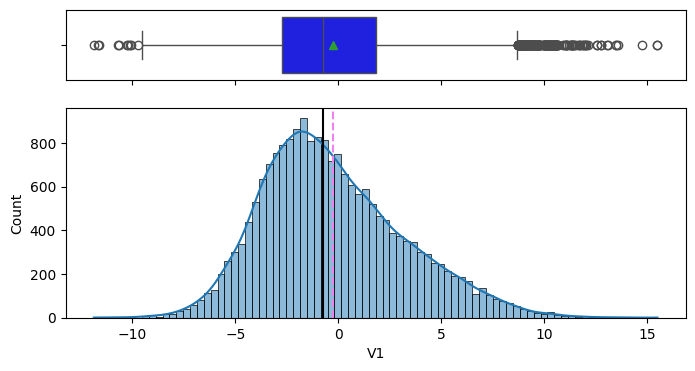

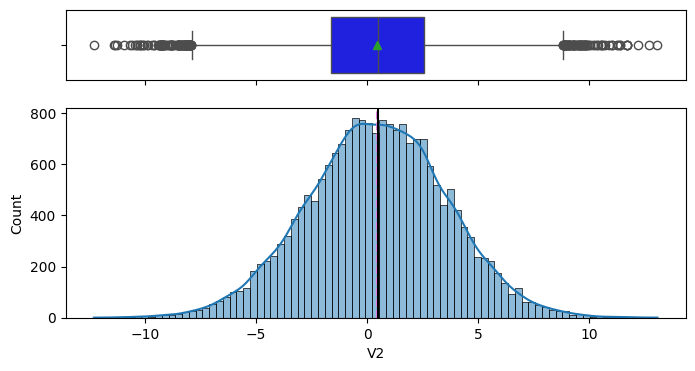

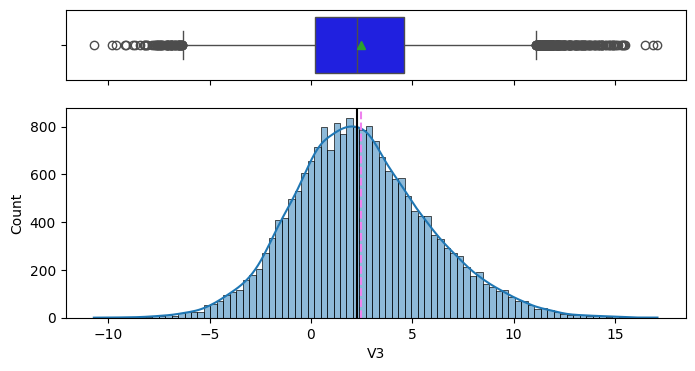

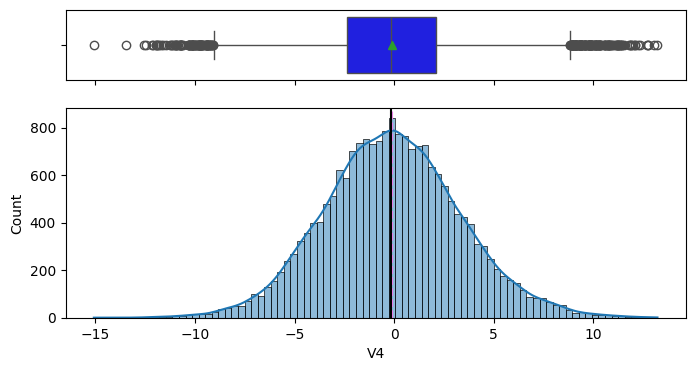

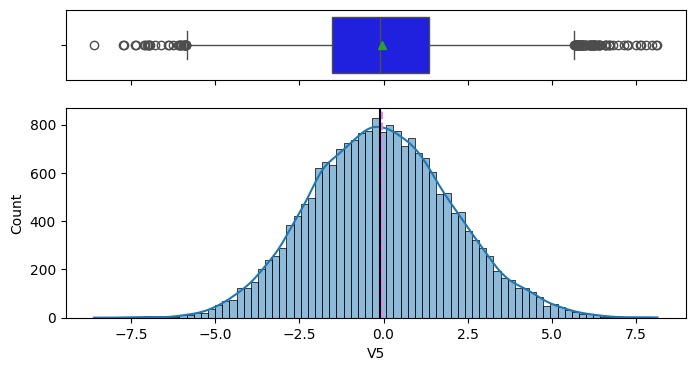

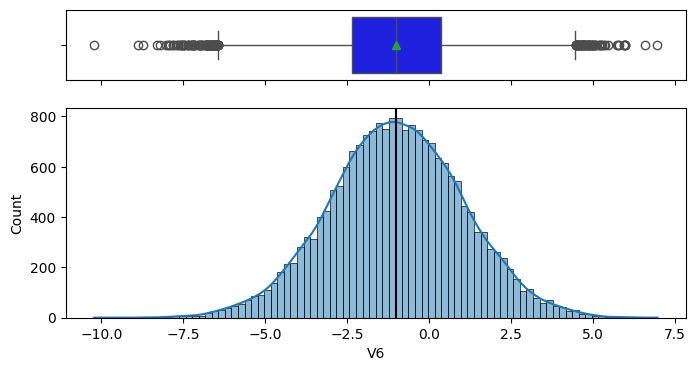

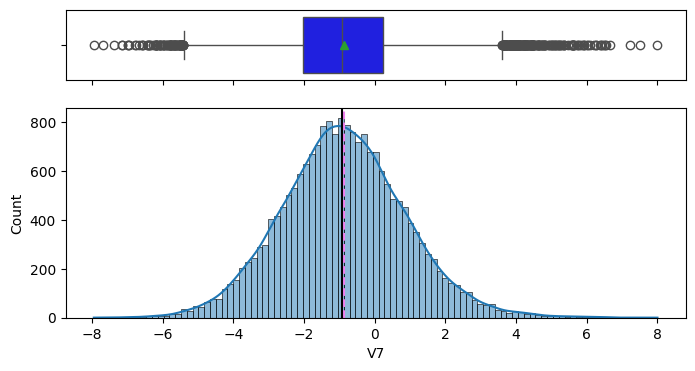

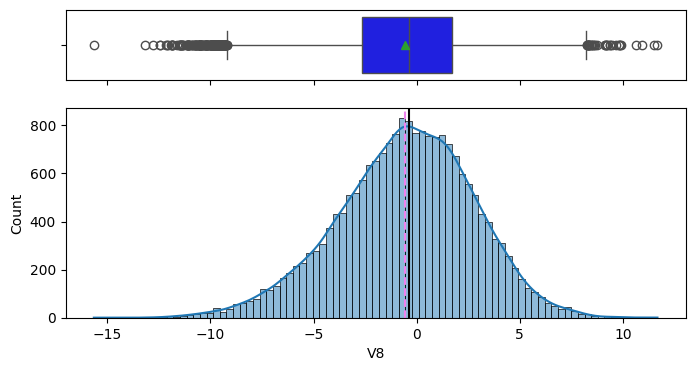

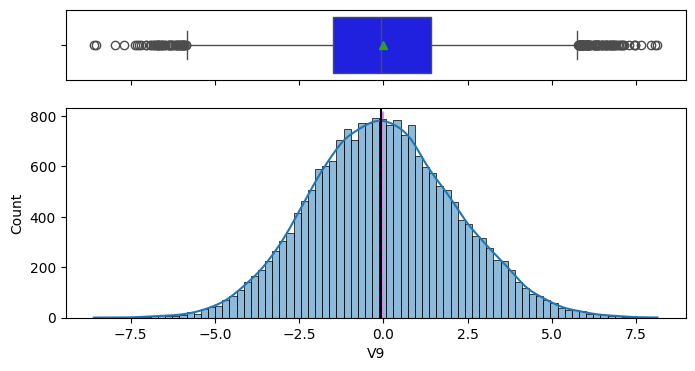

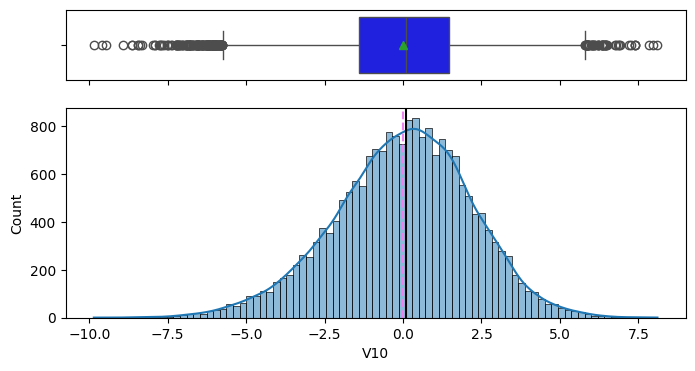

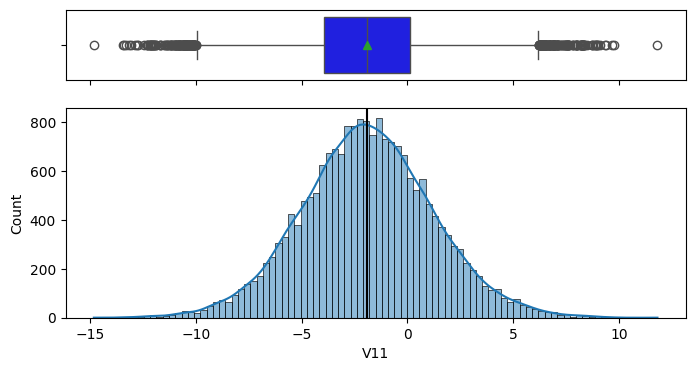

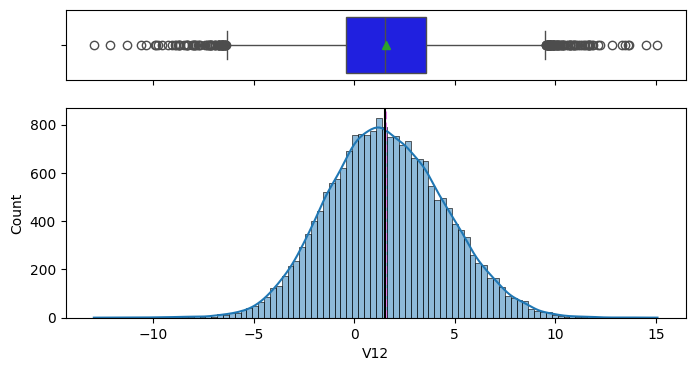

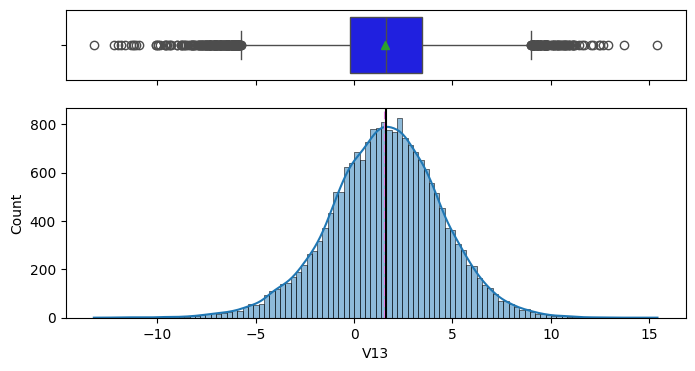

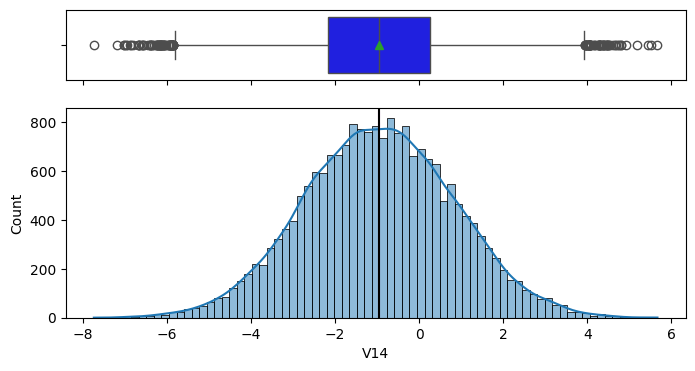

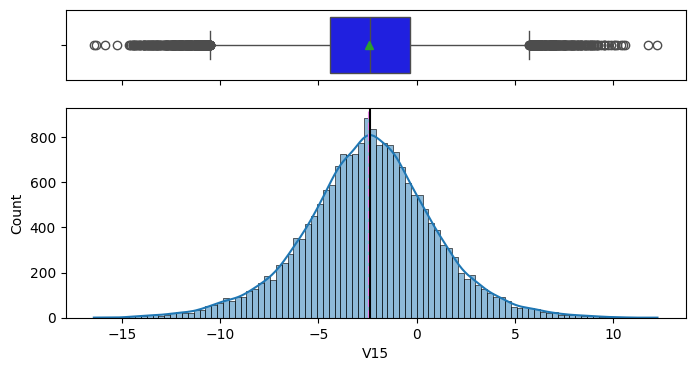

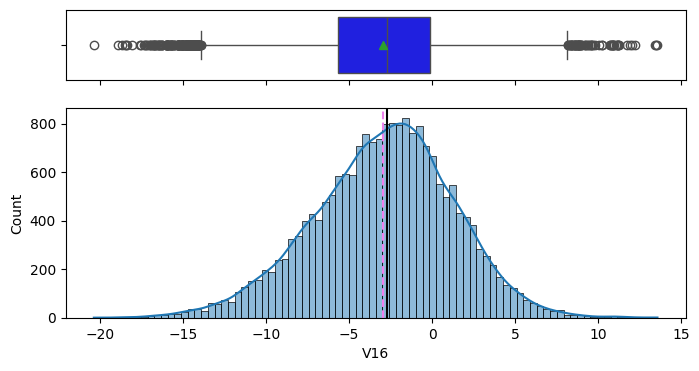

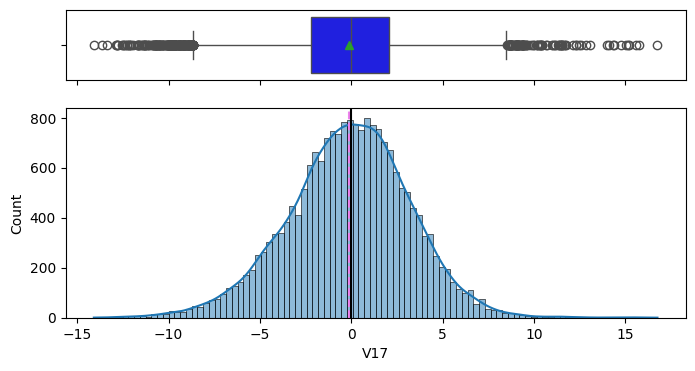

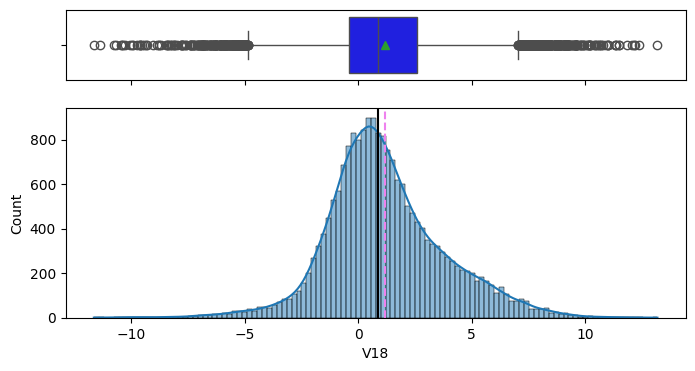

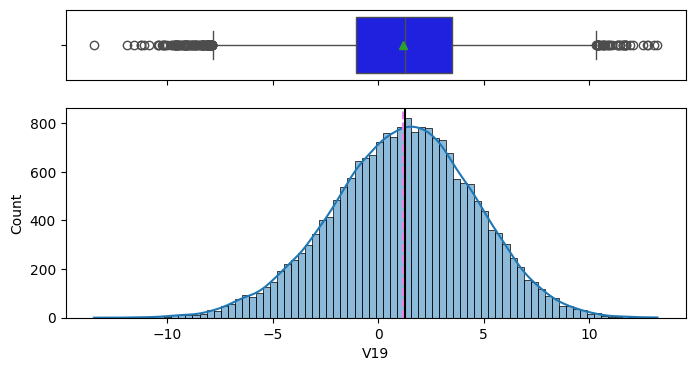

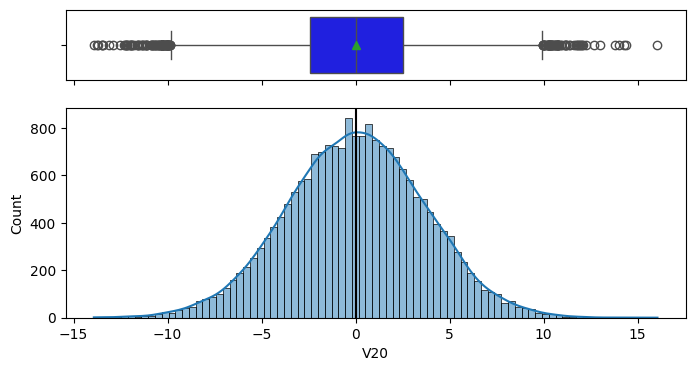

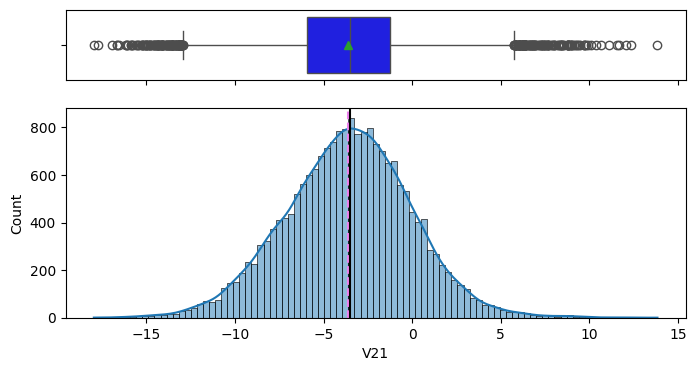

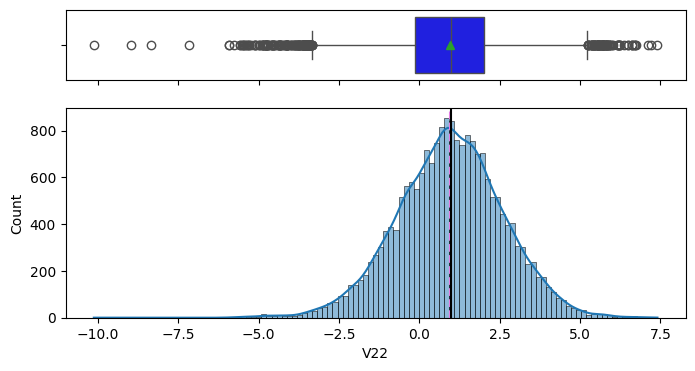

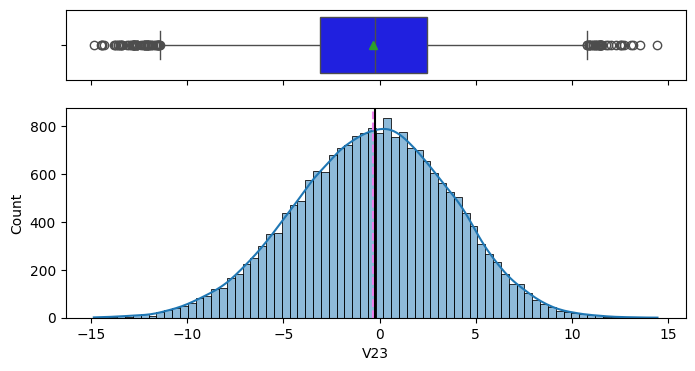

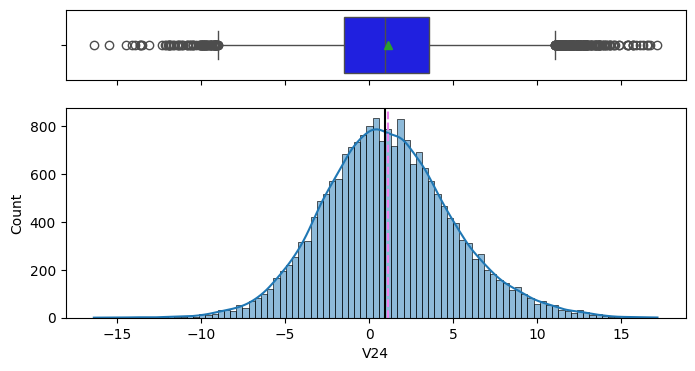

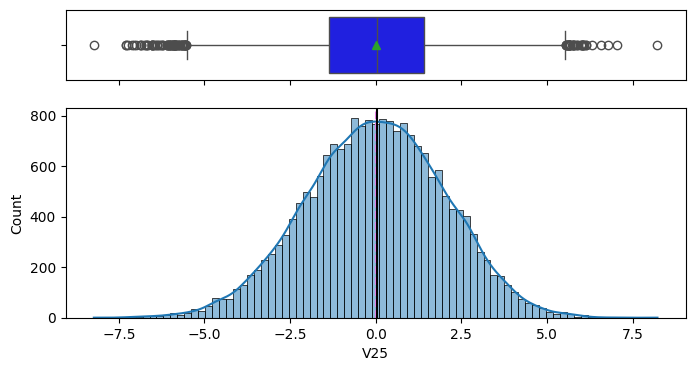

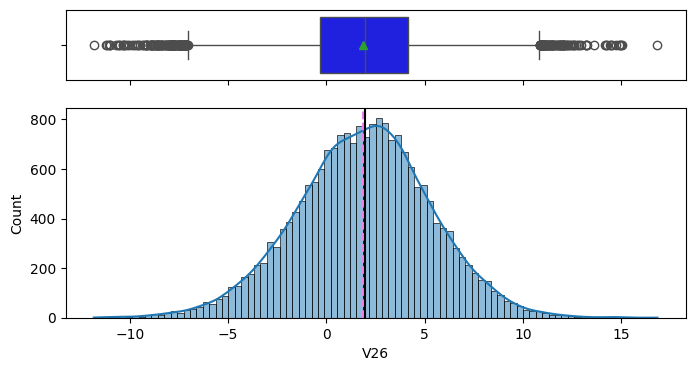

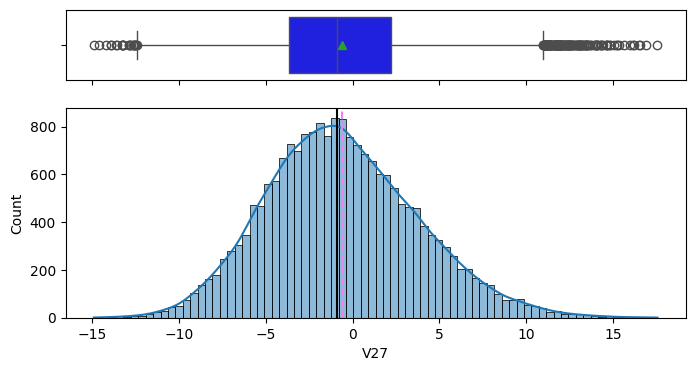

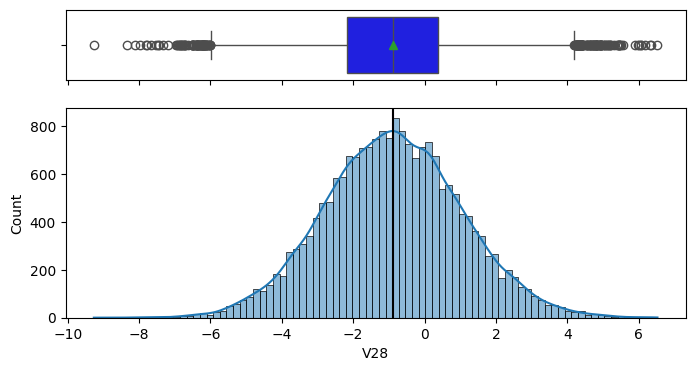

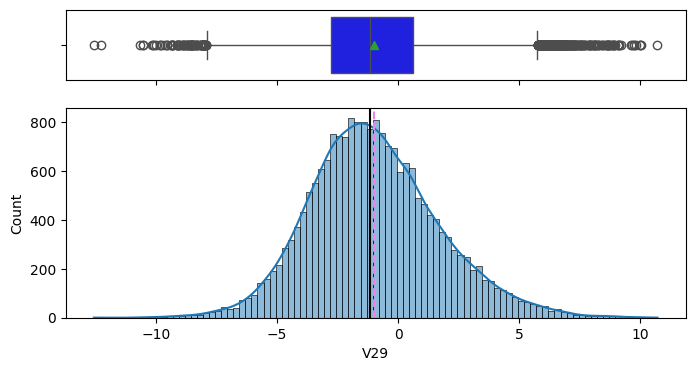

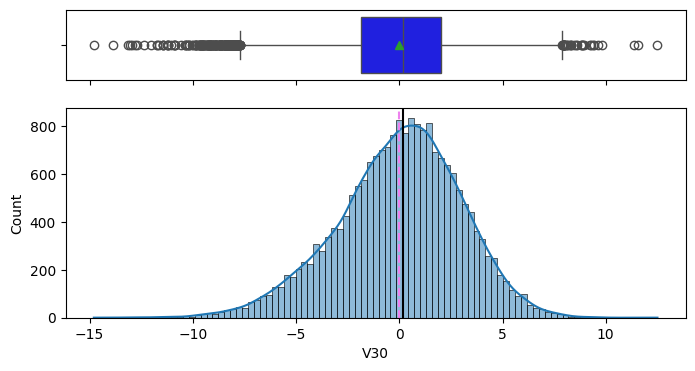

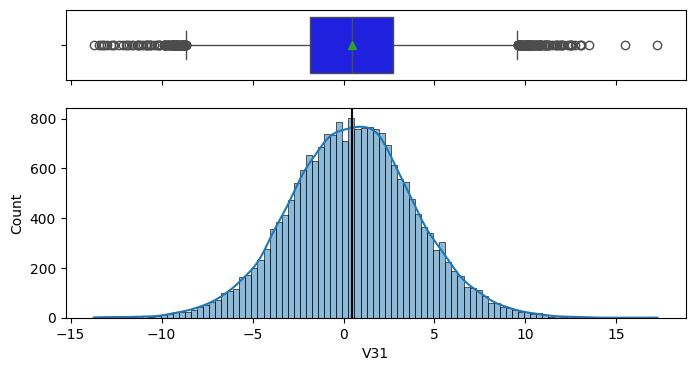

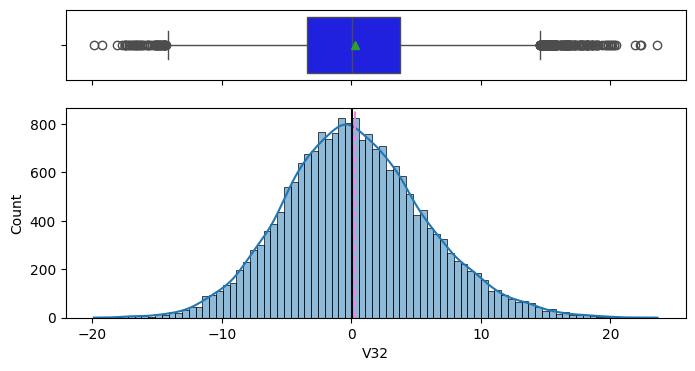

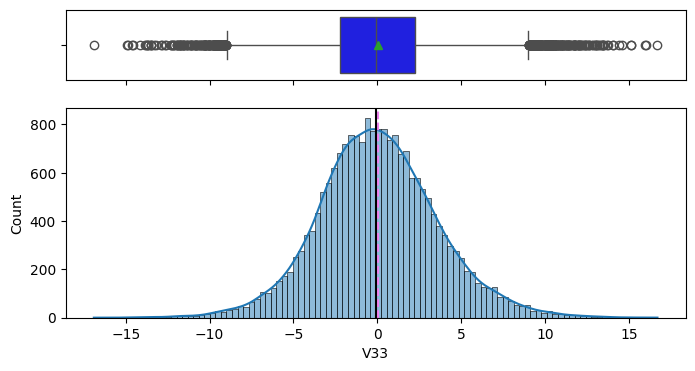

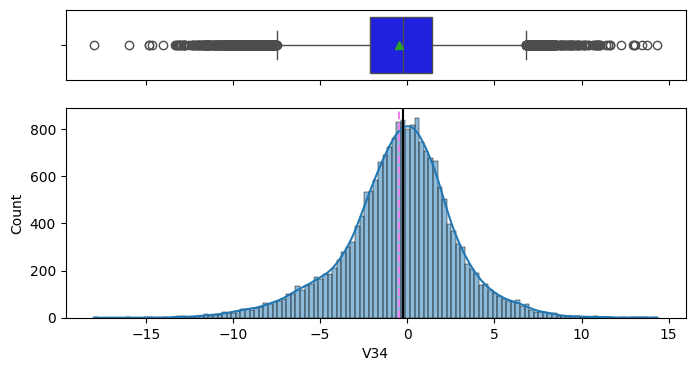

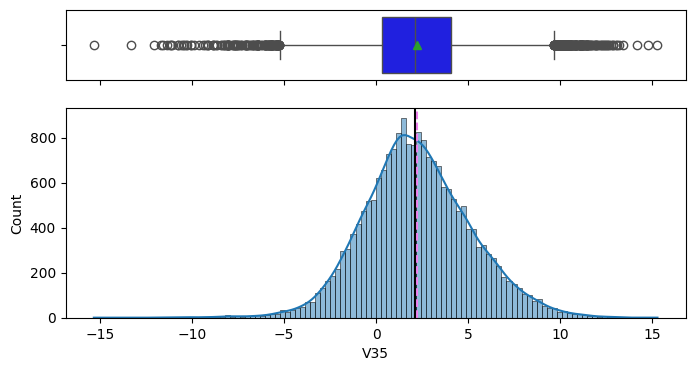

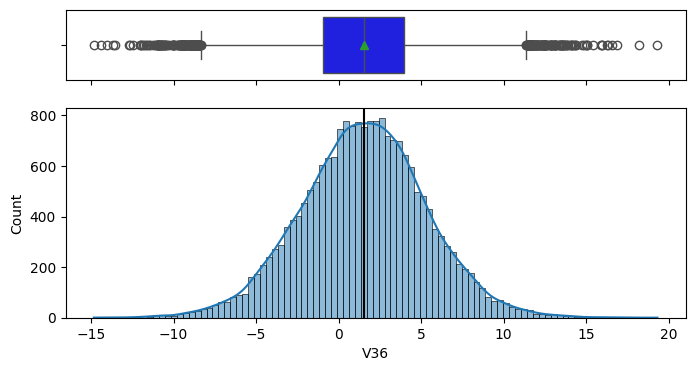

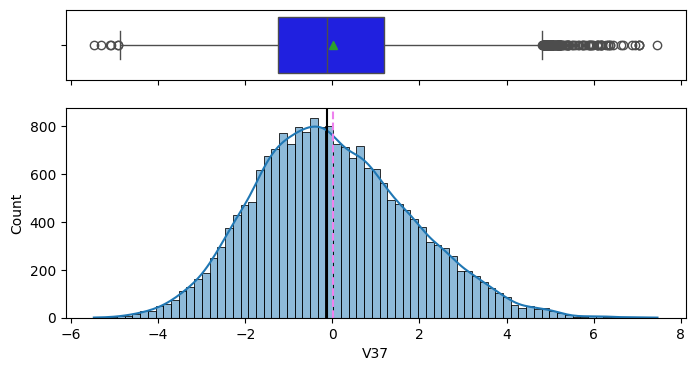

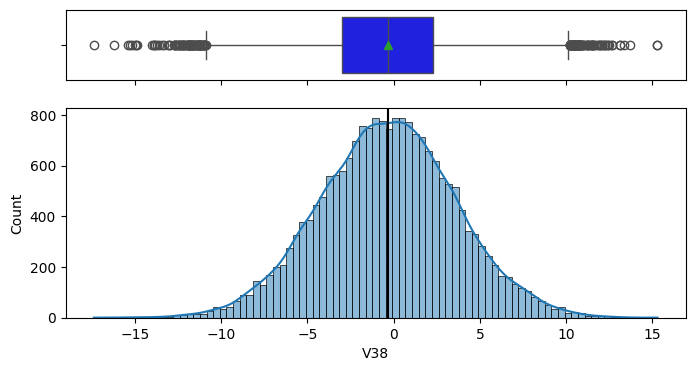

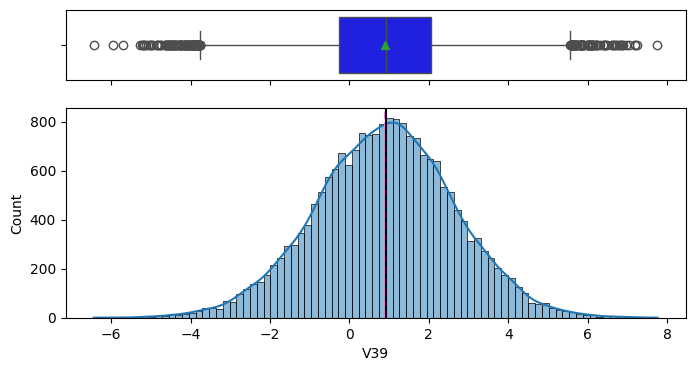

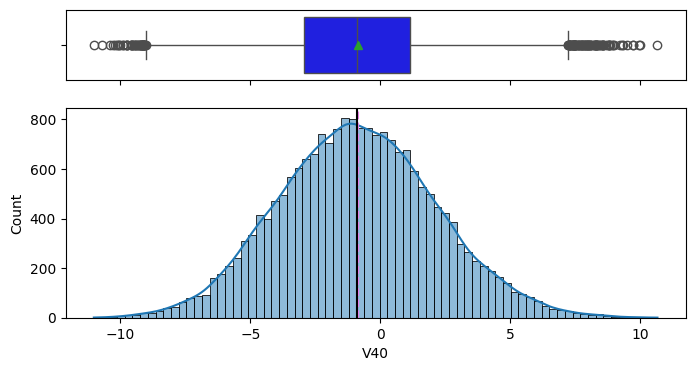

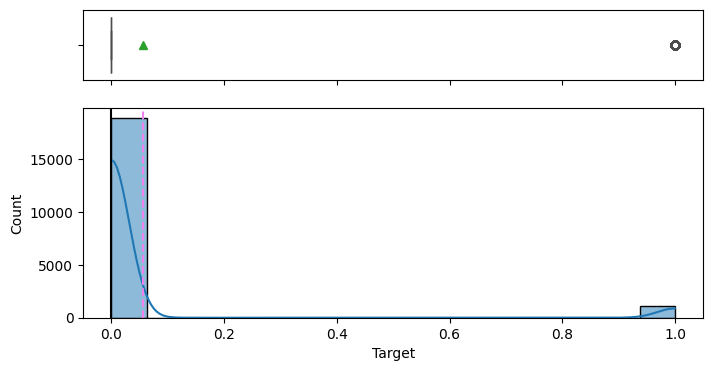

In [71]:
# Iterate through each column (feature) in the training dataframe
for feature in df_Train.columns:
    # For each feature, create both a histogram and boxplot visualization
    # Parameters: dataframe, feature name, figure size (8,6), show plot (True), and no custom bins (None)
    histogram_boxplot(df_Train, feature, (8, 4), True, None)

In [72]:
# Extract key observations from the plots
print(f"Observations for {feature}:")
print(f"Distribution shape: {'Normal' if df_Train[feature].skew() < 0.5 else 'Skewed'}")
print(f"Outliers present: {'Yes' if abs(df_Train[feature].max() - df_Train[feature].mean()) > 3*df_Train[feature].std() else 'No'}")
print(f"Mean value: {df_Train[feature].mean():.2f}")
print(f"Data range: {df_Train[feature].min():.2f} to {df_Train[feature].max():.2f}")

Observations for Target:
Distribution shape: Skewed
Outliers present: Yes
Mean value: 0.06
Data range: 0.00 to 1.00


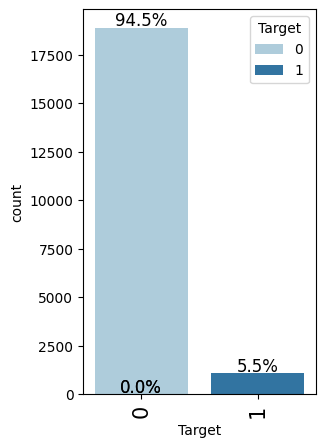

In [73]:
labeled_barplot(df_Train,'Target',perc =True)

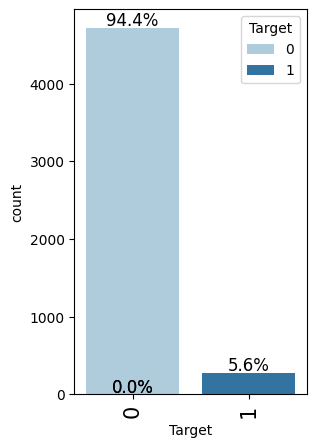

In [74]:
labeled_barplot(df_Test,'Target',perc =True)

### **Observation on Univariate Analysis**
1. As per the above plots ,the predictor variables have little skewness
2. Outliers are present in all predictor variables, outlier removal is not required as we don;t have information on columns (which part of the machine )
3. Target Variable on Train Dataset - 94.5% of this dataset are having machine failure status , 5.5% with no failure
4. Target Variable on Test Dataset - 94.4 % of this dataset are having machine failure status , 5.6% with no failure

## Bivariate Analysis

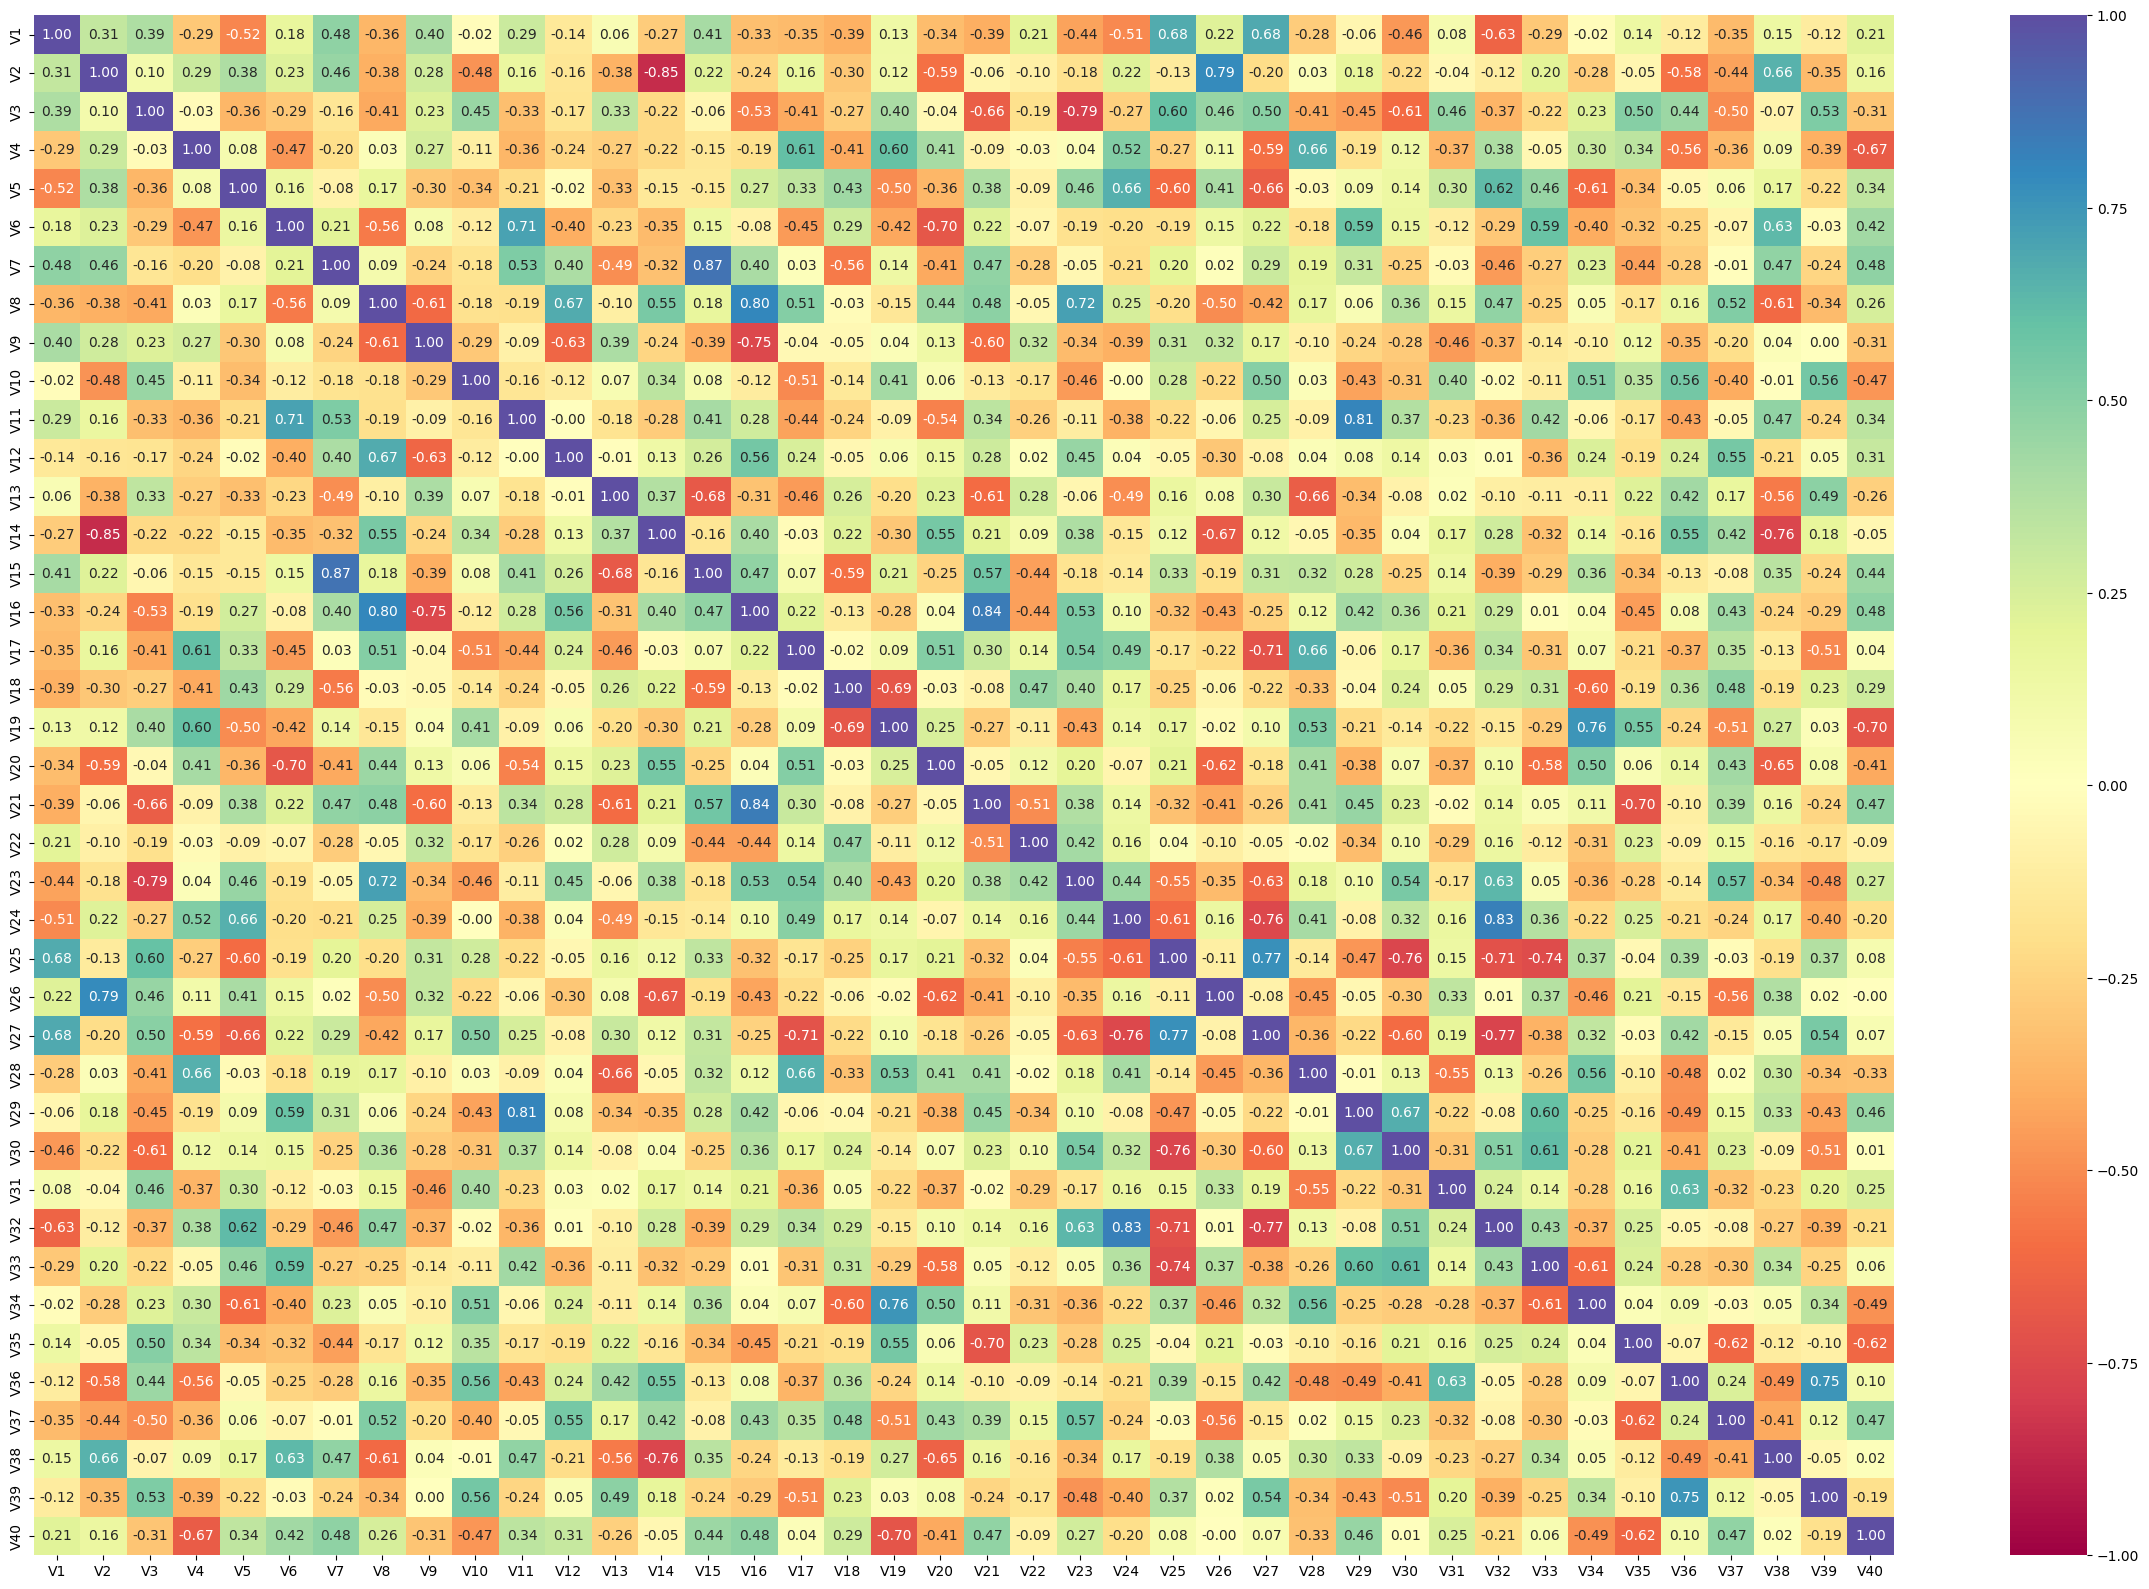

In [75]:
#performing Bivariate analysis 
cols_list = df_Train.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Target")
plt.figure(figsize=(30,20))
sns.heatmap(df_Train[cols_list].corr(),annot = True,vmin=-1,vmax =1,fmt = ".2f",cmap = "Spectral")
plt.show()

### **Observation on Bivariate Analysis**
**Positive Corelation >= 0.8**
1. V7 with V15
2. V8 with V16
3. V11 with v29
and some more

**Negative Correlation <=0.7**
1. V2 with V14
2. V3 with V23
3. V6 with V20 etc
There are other pridictive varibales whose corrleation are positive as well as negaive . 
Let's try Reg Plt  for some of the above mentioned predicted variables 


<Axes: xlabel='V15', ylabel='V7'>

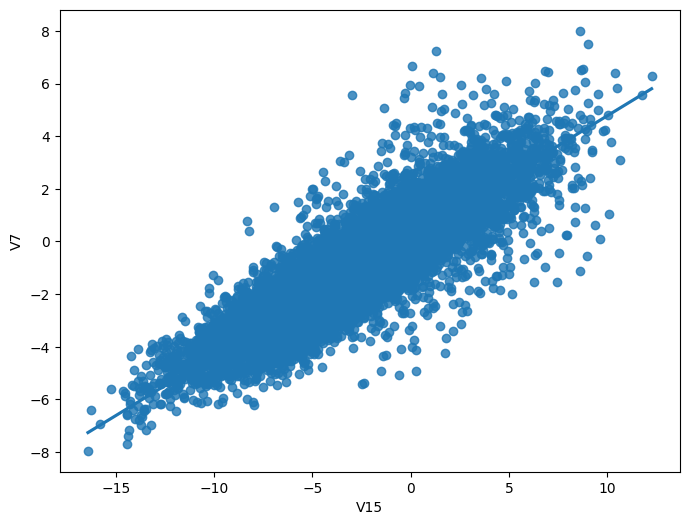

In [76]:
plt.figure(figsize=(8, 6))
sns.regplot(y=df_Train.V7, x=df_Train.V15)    

Significant positive correlation between V7 and V15 

<Axes: xlabel='V14', ylabel='V2'>

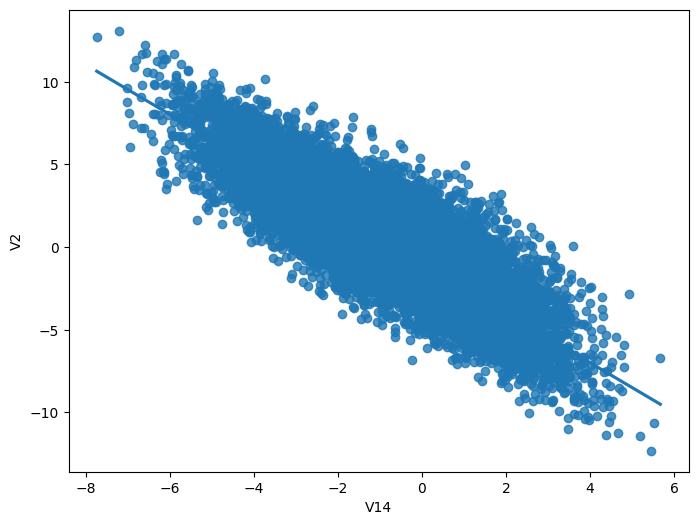

In [77]:
plt.figure(figsize=(8, 6))
sns.regplot(y=df_Train.V2, x=df_Train.V14)

Highly Neagitve corelation between v2 and v14

<Axes: xlabel='V6', ylabel='V20'>

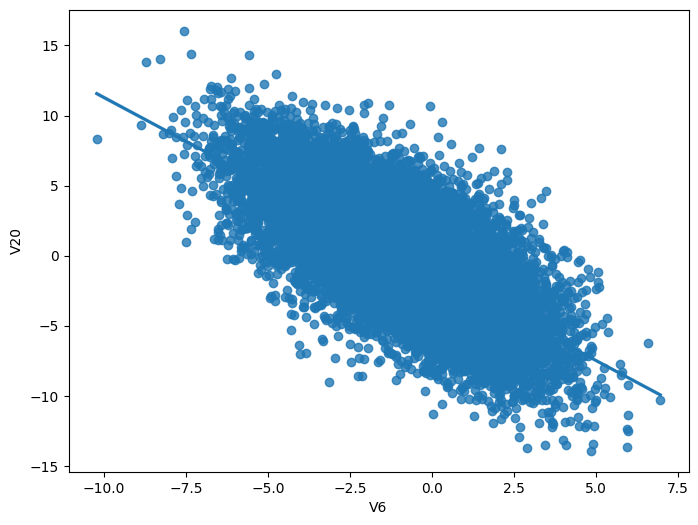

In [78]:
plt.figure(figsize=(8, 6))
sns.regplot(y=df_Train.V20, x=df_Train.V6)    

Highly Neagitve corelation between v6 and v20 

# **Data Preprocessing**

In [290]:
##Changing Traget Varibale Datatype from Int to float 

df_Train['Target'] = df_Train['Target'].astype(float)
df_Test['Target'] = df_Test['Target'].astype(float)

In [79]:
# Separating dataset for taget variable and spliting in Train ,val and Test ,to avoid data leakage

X = df_Train.drop(['Target'],axis =1)
y = df_Train['Target']



In [80]:
x_train,x_val,y_train,y_val = train_test_split(
    X,y,test_size=0.2,random_state=1,stratify=y)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(16000, 40)
(4000, 40)
(16000,)
(4000,)


In [81]:
# Dividing test data into X_test and y_test
X_test = df_Test.drop(columns = ['Target'] , axis= 1)
y_test = df_Test["Target"]

## **Treat Missing Value**

Replacing with median: In this method the missing values are imputed with the median of the column. In cases where the column has outliers, median is an appropriate measure of central tendency to deal with the missing values over mean.

In [82]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(x_train)

x_train_si = impute.transform(x_train)
x_val_si = imputer.transform(x_val)

In [83]:
x_train = pd.DataFrame(x_train_si,columns=x_train.columns, index=x_train.index)
x_val = pd.DataFrame(x_val_si, columns=x_val.columns, index=x_val.index)

# **Model Building**

## Model Evaluation Criterion

Model Evaluation Criterion is based on the given objective for this use case

* Objective: Identify failures to enable pre-failure repairs, reducing replacement costs.

* True Positives (TP): Correctly predicted failures (Repairs - lower cost).

* False Negatives (FN): Real failures missed by the model (Replacements - HIGHEST COST).

* False Positives (FP): Predicted failures that aren't failures (Inspections - lowest cost).

Given that replacement costs (due to False Negatives) are the highest, our primary goal is to minimize False Negatives. This directly translates to maximizing Recall.

Recall Definition: Recall = TP / (TP + FN). A higher recall means fewer actual failures are missed by the model.

Hence, our neural network model should be based on higher **Recall**

While recall is the priority, **precision** must be reasonably high to avoid too many false alarms, which would lead to unnecessary inspections and increased operational overhead.




## **Utility Functions**

In [84]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [85]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='macro')  # to compute Recall
    precision = precision_score(target, pred, average='macro')  # to compute Precision
    f1 = f1_score(target, pred, average='macro')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index = [0]
    )

    return df_perf

In [86]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [87]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train recall","validation recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [88]:
#defining batch_size and epochs to be used as same values for all models 
batch_size = 32
epochs = 50

In [89]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [90]:
# initializing the neural network
model_0 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_0.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_0.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_0.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [93]:
start = time.time()
history = model_0.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - Recall: 0.2355 - loss: 0.2048 - val_Recall: 0.5991 - val_loss: 0.0991
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - Recall: 0.5939 - loss: 0.0898 - val_Recall: 0.7477 - val_loss: 0.0871
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - Recall: 0.7078 - loss: 0.0739 - val_Recall: 0.7568 - val_loss: 0.0779
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - Recall: 0.7347 - loss: 0.0683 - val_Recall: 0.7568 - val_loss: 0.0749
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - Recall: 0.7788 - loss: 0.0615 - val_Recall: 0.7793 - val_loss: 0.0720
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - Recall: 0.7641 - loss: 0.0622 - val_Recall: 0.7883 - val_loss: 0.0700
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - Recall: 0.7742 - loss: 0.0620 - val_Recall: 0.7973 - val_loss: 0.0682
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - Recall: 0.8101 - loss: 0.0554 - val_Recall: 0.8063 - val_loss:

In [94]:
print("Time taken in seconds ",end-start)

Time taken in seconds  6.92151403427124


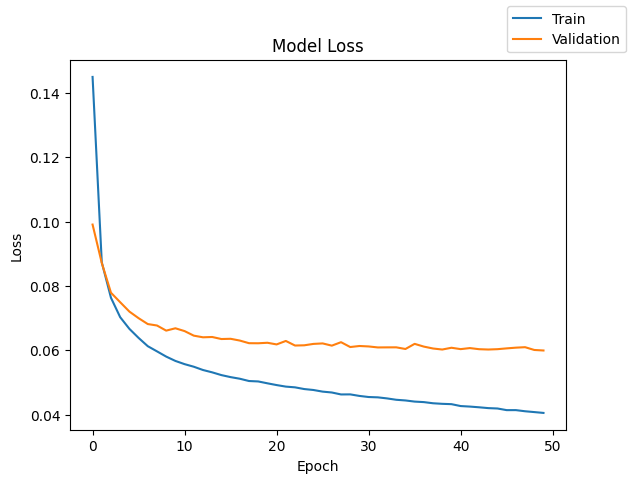

In [95]:
plot(history,'loss')

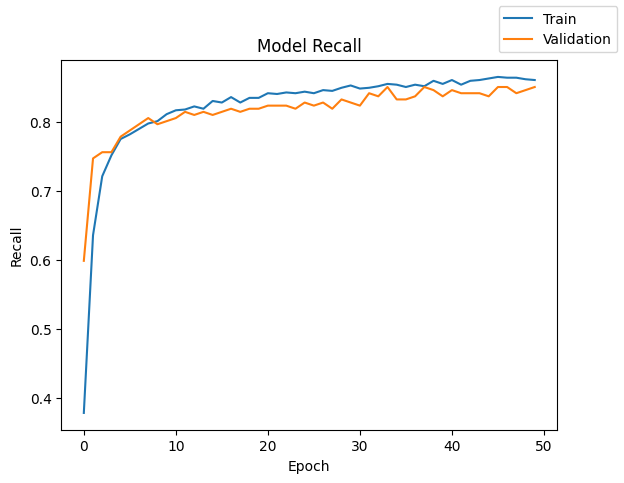

In [96]:
plot(history,'Recall')

1. Both training and validation recall rise sharply within the first 10 epochs, indicating that the model is learning relevant patterns quickly early in training.
2. After ~20 epochs, training recall continues to improve slightly, while validation recall plateaus and fluctuates. This indicates minor overfitting

3. A small gap is visible between training and validation recall, indicating the model may benefit from:
    * Dropout or regularization

In [97]:
model_0_train_perf = model_performance_classification(model_0, x_train, y_train) #threshold = 0.5
print("Model 0 Train Performance")
print(model_0_train_perf)
print("-"*50)
print("Model 0 Validation Performance")
model_0_val_perf = model_performance_classification(model_0,x_val,y_val)
print(model_0_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step
Model 0 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.992125  0.934884   0.989206  0.960243
--------------------------------------------------
Model 0 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 155us/step
   Accuracy    Recall  Precision  F1 Score
0      0.99  0.924749   0.977805  0.949515


In [98]:
#let's get classification report on y train and y val for Model 0
y_train_pred_0 = model_0.predict(x_train)
y_val_pred_0 = model_0.predict(x_val)
print("Classification Report - Train data Model_0",end="\n\n")
cr_train_model_0 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_0)
print("Classification Report - Validation data Model_0",end="\n\n")
cr_val_model_0 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_0)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step
Classification Report - Train data Model_0

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15112
           1       0.99      0.87      0.92       888

    accuracy                           0.99     16000
   macro avg       0.99      0.93      0.96     16000
weighted avg       0.99      0.99      0.99     16000

Classification Report - Validation data Model_0

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3778
           1       0.96      0.85      0.90       222

    accuracy                           0.99      4000
   macro avg       0.98      0.92      0.95      4000
weighted avg       0.99      0.99      0.99      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 148us/step


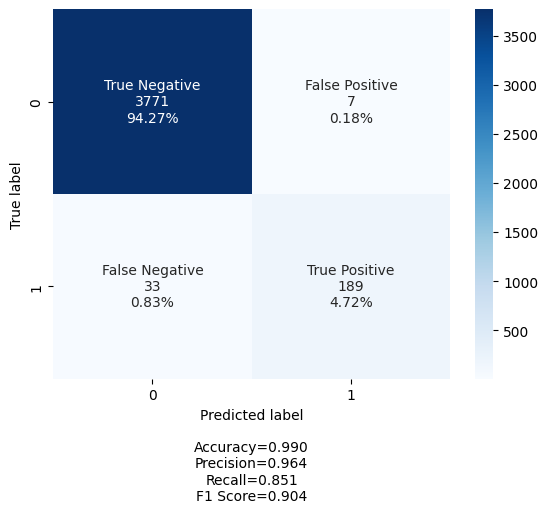

In [99]:
# Predict probabilities using confusion matrix 
y_pred = model_0.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [100]:
#assigning last epoch loss and recall for both train and val for quick comparision
results.loc[0] = [1,[128],
                  ["relu"],50,32,["sgd"] ,
                  [0.01, "-"],"-","-",
                  history.history["loss"][-1]
                  ,history.history["val_loss"][-1]
                  ,history.history["Recall"][-1]
                  ,history.history["val_Recall"][-1],round(end-start,2)]

In [271]:
results.head(1)

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534          0.05994      0.861486           0.851351         6.92

### **Observations**
**Classification Report - Train data Model_0**
1. High precision (0.99) for failures (class 1): Most of the predicted failures were correct, meaning the model rarely mislabels healthy generators as failed.

2. Moderate recall (0.88) for failures: 12% of actual failures were missed by the model — room for improvement in catching all failure cases.

3. Overall accuracy is 99%, but due to class imbalance (many more non-failures than failures), F1-score for class 1 is a better indicator.

4. Macro average recall (0.93) reflects imbalance — model is slightly less sensitive to the minority class (failures).

**Classification Report - Validation data Model_0**
1. Slight drop in recall on validation (0.85) for failures — the model misses more failure cases compared to training (potential mild overfitting).

2. Precision remains strong (0.97) for failures — false alarms (false positives) are rare.

3. F1-score of 0.90 for failures is still very good, indicating balanced performance.

**Note** Consistency in performance across train and validation shows the model generalizes well but can benefit from techniques to boost recall (like class weighting (as the dataset has class imbalance), adding additonal hidden layer, changing optimizer or using Drop out /regularisation). We'll imporve out model accordingly


# **Model Performance Improvement**

## Model 1

Let's add another hidden layer (ReLU activation function and 64 units) with same SGD Optimizer to see how much the model improves upon adding another layer

In [102]:
#clear current keras session
tf.keras.backend.clear_session()

In [103]:
# initializing the neural network
model_1 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_1.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [104]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
#SGD Optiomizer
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [106]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - Recall: 0.3526 - loss: 0.1638 - val_Recall: 0.6622 - val_loss: 0.0894
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - Recall: 0.6919 - loss: 0.0810 - val_Recall: 0.7477 - val_loss: 0.0772
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - Recall: 0.7575 - loss: 0.0723 - val_Recall: 0.7658 - val_loss: 0.0710
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - Recall: 0.8019 - loss: 0.0583 - val_Recall: 0.8108 - val_loss: 0.0678
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - Recall: 0.8150 - loss: 0.0574 - val_Recall: 0.8108 - val_loss: 0.0651
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - Recall: 0.8153 - loss: 0.0534 - val_Recall: 0.8153 - val_loss: 0.0630
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - Recall: 0.8270 - loss: 0.0528 - val_Recall: 0.8153 - val_loss: 0.0617
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - Recall: 0.8386 - loss: 0.0499 - val_Recall: 0.8198 - val_loss:

In [107]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.699712038040161


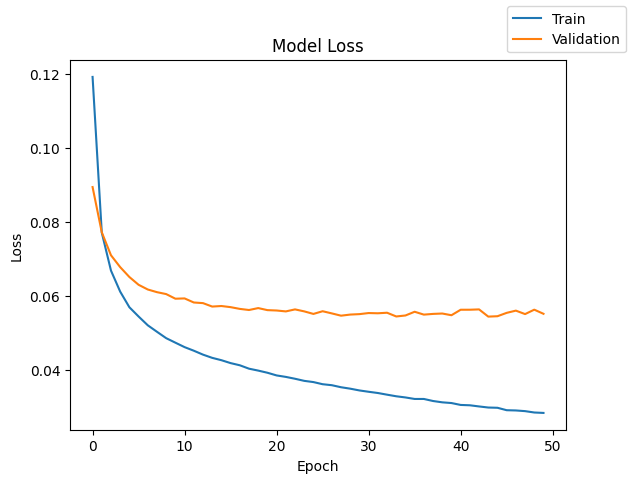

In [108]:
plot(history,'loss')

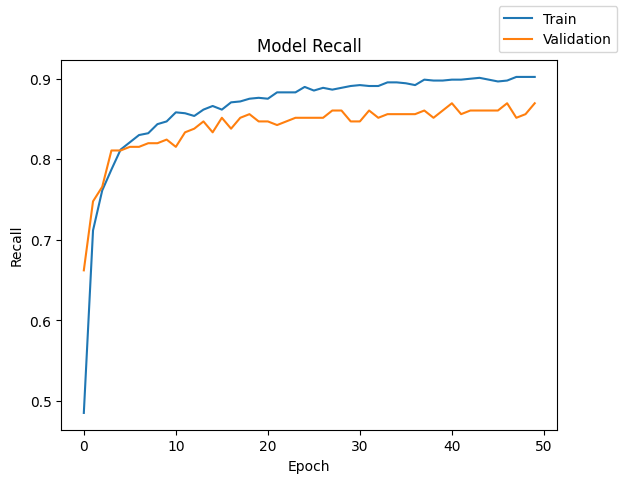

In [109]:
plot(history,'Recall')

In [110]:
model_1_train_perf = model_performance_classification(model_1, x_train, y_train) #threshold = 0.5
print("Model 1 Train Performance")
print(model_1_train_perf)
print("-"*50)
print("/nModel 1 Validation Performance")
model_1_val_perf = model_performance_classification(model_1,x_val,y_val)
print(model_1_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step
Model 1 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.994437  0.953597   0.992995   0.97237
--------------------------------------------------
/nModel 1 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step
   Accuracy    Recall  Precision  F1 Score
0   0.99175  0.934155   0.986035  0.958444


*Adding one hdden layer ,increased the recall. this shows model has improved*

In [111]:
#let's get classification report on y train and y val for Model 0
y_train_pred_1 = model_1.predict(x_train)
y_val_pred_1 = model_1.predict(x_val)
print("Classification Report - Train data Model_1",end="\n\n")
cr_train_model_1 = classification_report(y_train,y_train_pred_1>0.5)
print(cr_train_model_1)
print("Classification Report - Validation data Model_1",end="\n\n")
cr_val_model_1 = classification_report(y_val,y_val_pred_1>0.5)
print(cr_val_model_1)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step
Classification Report - Train data Model_1

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15112
           1       0.99      0.91      0.95       888

    accuracy                           0.99     16000
   macro avg       0.99      0.95      0.97     16000
weighted avg       0.99      0.99      0.99     16000

Classification Report - Validation data Model_1

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3778
           1       0.98      0.87      0.92       222

    accuracy                           0.99      4000
   macro avg       0.99      0.93      0.96      4000
weighted avg       0.99      0.99      0.99      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step


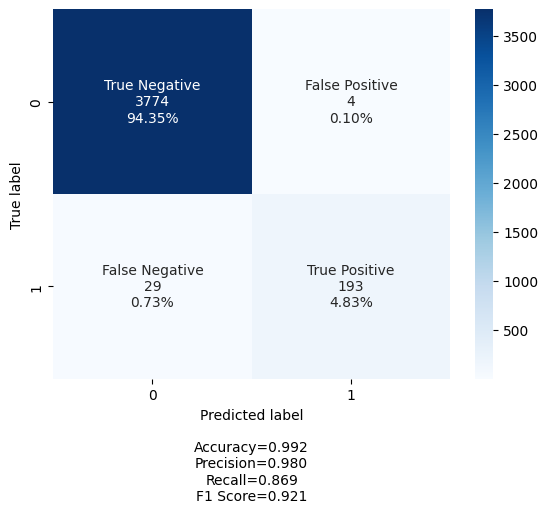

In [112]:
# Predict probabilities using confusion matrix 
y_pred = model_1.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [113]:
results.loc[1] = [2,[128,64],["relu","relu"],50,32,"sgd",[0.01, "-"],"-","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [114]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -              -    0.028434         0.055182      0.902027           0.869369         7.70

### *Observations*

1. Post adding another hidden layer, validation recall has slightly increased (from 0.85 to 0.88)
2. Precision is great with 99% and 97% for predicting generator failure for training and validataion data respectively.
3. Model is still overfitting , Train recall - 0.902027and validation Recall - 0.878378 and Gap between train and validation has increased , hence lets try out Regularization in the next model (dropout neurons)

## Model 2

To keep the same level of precision and to reduce the difference between train and validation recalls we can use regularization techniques.One of the common technique is dropouts.

In [115]:
#clear current keras session
tf.keras.backend.clear_session()

In [116]:
# initializing the neural network
model_2 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_2.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_2.add(Dropout(0.5))  # Adding 50% Dropout after first hidden layer
model_2.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_2.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
#SGD Optiomizer
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [119]:
start = time.time()
history = model_2.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - Recall: 0.2015 - loss: 0.2092 - val_Recall: 0.5315 - val_loss: 0.1075
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - Recall: 0.4688 - loss: 0.1357 - val_Recall: 0.6757 - val_loss: 0.0923
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - Recall: 0.5540 - loss: 0.1116 - val_Recall: 0.7342 - val_loss: 0.0838
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - Recall: 0.5992 - loss: 0.1044 - val_Recall: 0.7523 - val_loss: 0.0803
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - Recall: 0.6374 - loss: 0.0981 - val_Recall: 0.7613 - val_loss: 0.0769
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - Recall: 0.6628 - loss: 0.0921 - val_Recall: 0.7658 - val_loss: 0.0742
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - Recall: 0.6955 - loss: 0.0880 - val_Recall: 0.7748 - val_loss: 0.0713
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - Recall: 0.7119 - loss: 0.0796 - val_Recall: 0.7838 - val_loss:

In [120]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.07505202293396


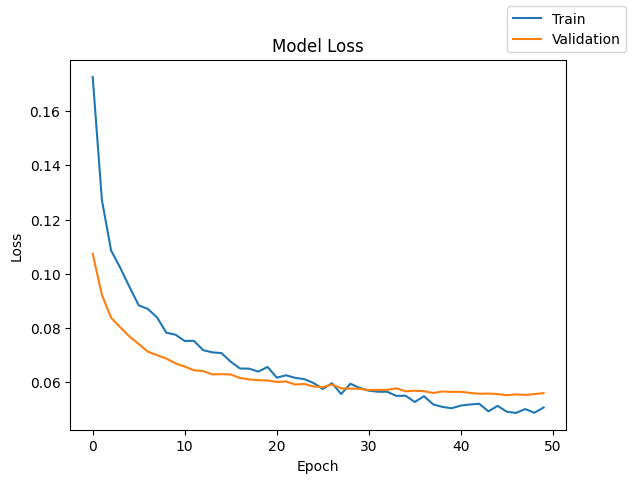

In [121]:
plot(history,'loss')

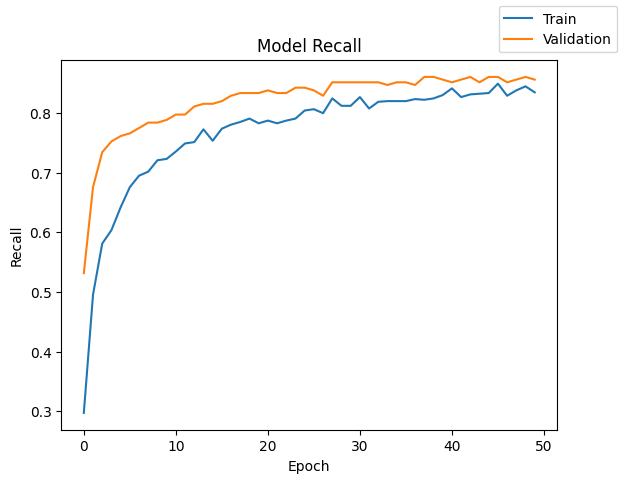

In [122]:
plot(history,'Recall')

1. **The validation recall curve is consistently above the training recall curve, which suggests that dropout helped reduce overfitting.**
2. **However, a 50% dropout might be too aggressive; we will try a lower dropout rate to strike a better balance between performance and generalization.**


In [123]:
model_2_train_perf = model_performance_classification(model_2, x_train, y_train) #threshold = 0.5
print("Model 2 Train Performance")
print(model_2_train_perf)
print("-"*50)
print("Model 2 Validation Performance")
model_2_val_perf = model_performance_classification(model_2,x_val,y_val)
print(model_2_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step
Model 2 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.992938  0.941144   0.990906  0.964526
--------------------------------------------------
Model 2 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step
   Accuracy    Recall  Precision  F1 Score
0   0.99025  0.927002   0.978026  0.950888


In [124]:
#let's get classification report on y train and y val for Model 2
y_train_pred_2 = model_2.predict(x_train)
y_val_pred_2 = model_2.predict(x_val)
print("Classification Report - Train data Model_2",end="\n\n")
cr_train_model_2 = classification_report(y_train,y_train_pred_2>0.5)
print(cr_train_model_2)
print("Classification Report - Validation data Model_2",end="\n\n")
cr_val_model_2 = classification_report(y_val,y_val_pred_2>0.5)
print(cr_val_model_2)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step
Classification Report - Train data Model_2

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15112
           1       0.99      0.88      0.93       888

    accuracy                           0.99     16000
   macro avg       0.99      0.94      0.96     16000
weighted avg       0.99      0.99      0.99     16000

Classification Report - Validation data Model_2

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3778
           1       0.96      0.86      0.91       222

    accuracy                           0.99      4000
   macro avg       0.98      0.93      0.95      4000
weighted avg       0.99      0.99      0.99      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step


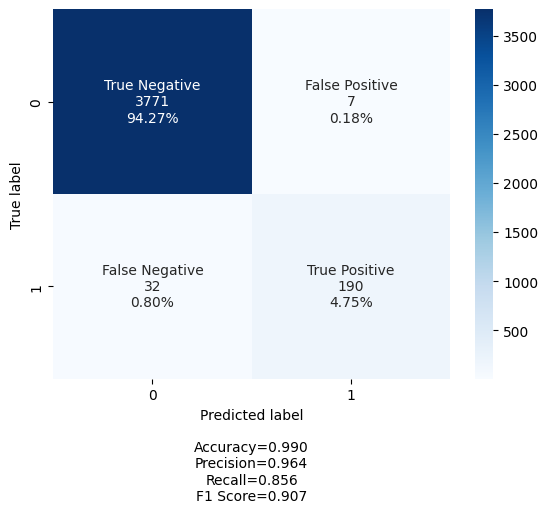

In [125]:
# Predict probabilities using confusion matrix 
y_pred = model_2.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [126]:
results.loc[2] = [2,[128,64],["relu","relu"],50,32,"sgd",[0.01, "-"],"-","dropout(0.5)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [127]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -              -    0.028434         0.055182      0.902027           0.869369         7.70
2                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08

### *Observations*
1. Post applying 50% Dropout , we see the validayion recall of the model is now higher than train recall , this means the dropout helped reducing overfitting
2. However, the Validation recall dropped to ~85% compared to previous model ~88%. We can try adding another layer and decrease the dropout to 30%
3. Another options is to insert Batch Normalization before or after the activation fucntion to stabilize the training and potentially increase recall.

## Model 3

Updating dropout to 30% and adding another hidden layer 

In [128]:
#clear current keras session
tf.keras.backend.clear_session()

In [129]:
# initializing the neural network
model_3 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_3.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_3.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_3.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_3.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_3.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
#SGD Optiomizer
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_3.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [132]:
start = time.time()
history = model_3.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - Recall: 0.1136 - loss: 0.1984 - val_Recall: 0.6081 - val_loss: 0.1010
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - Recall: 0.5237 - loss: 0.1175 - val_Recall: 0.7072 - val_loss: 0.0837
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - Recall: 0.6236 - loss: 0.0951 - val_Recall: 0.7793 - val_loss: 0.0762
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - Recall: 0.6721 - loss: 0.0903 - val_Recall: 0.7658 - val_loss: 0.0713
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - Recall: 0.7158 - loss: 0.0804 - val_Recall: 0.8108 - val_loss: 0.0673
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - Recall: 0.7613 - loss: 0.0781 - val_Recall: 0.8063 - val_loss: 0.0648
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - Recall: 0.7355 - loss: 0.0670 - val_Recall: 0.8063 - val_loss: 0.0624
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - Recall: 0.7814 - loss: 0.0717 - val_Recall: 0.8243 - val_loss:

In [133]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.56450891494751


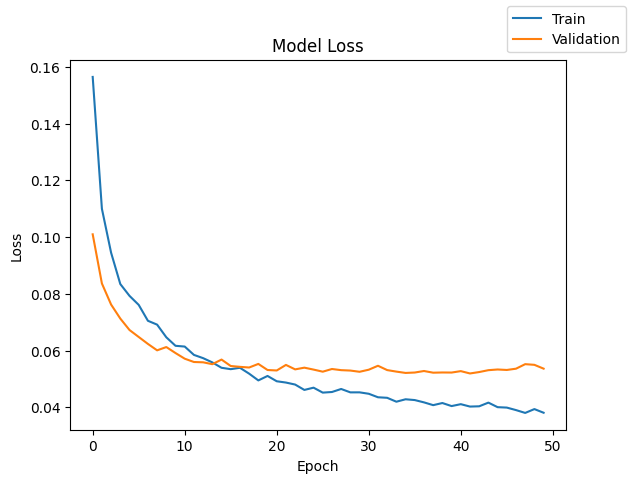

In [134]:
plot(history,'loss')

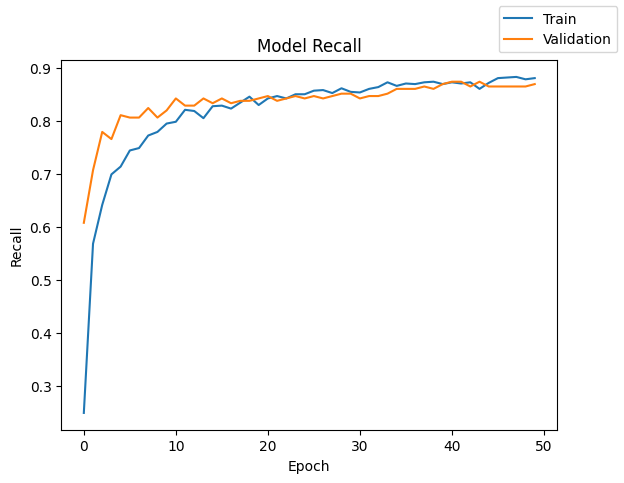

In [135]:
plot(history,'Recall')

**30% dropout with one additonal hidden layer gives a better result than previous model. This model shows an early convergence of train and validation recall (at ~10 Epochs)**

In [136]:
model_3_train_perf = model_performance_classification(model_3, x_train, y_train) #threshold = 0.5
print("Model 3 Train Performance")
print(model_3_train_perf)
print("-"*50)
print("Model 3 Validation Performance")
model_3_val_perf = model_performance_classification(model_3,x_val,y_val)
print(model_3_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 144us/step
Model 3 Train Performance
   Accuracy    Recall  Precision  F1 Score
0   0.99375  0.948463   0.991422  0.968834
--------------------------------------------------
Model 3 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step
   Accuracy    Recall  Precision  F1 Score
0    0.9915  0.934023    0.98356  0.957281


In [137]:
#let's get classification report on y train and y val for Model 3
y_train_pred_3 = model_3.predict(x_train)
y_val_pred_3 = model_3.predict(x_val)
print("Classification Report - Train data Model_3",end="\n\n")
cr_train_model_3 = classification_report(y_train,y_train_pred_3>0.5)
print(cr_train_model_3)
print("Classification Report - Validation data Model_3",end="\n\n")
cr_val_model_3 = classification_report(y_val,y_val_pred_3>0.5)
print(cr_val_model_3)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 173us/step
Classification Report - Train data Model_3

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15112
           1       0.99      0.90      0.94       888

    accuracy                           0.99     16000
   macro avg       0.99      0.95      0.97     16000
weighted avg       0.99      0.99      0.99     16000

Classification Report - Validation data Model_3

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3778
           1       0.97      0.87      0.92       222

    accuracy                           0.99      4000
   macro avg       0.98      0.93      0.96      4000
weighted avg       0.99      0.99      0.99      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step


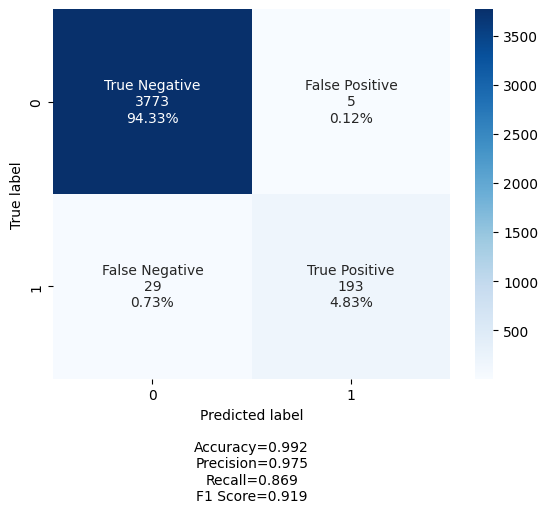

In [138]:
# Predict probabilities using confusion matrix 
y_pred = model_3.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [139]:
results.loc[3] = [3,[128,64,64],["relu","relu","relu"],50,32,"sgd",[0.01, "-"],"-","dropout(0.3)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [140]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -              -    0.028434         0.055182      0.902027           0.869369         7.70
2                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56

### **Observations**

1. Decreasing dropout percentage to 30% from 50% minimzed the gap between train and validation recall
2. Both Train and Validation recall has increased compared to 50% dropout model.
3. We will now stick with 30% dropout for now , also as we see imbalance in class distribution, we will now have to use class weights to allow the model to give proportionallly more importance to minority class(e.g. False Negative) 

## Model 4

In [141]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train.astype(int)) # Convert y_train to integers

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.0587612493382743, 1: 18.01801801801802}

In [142]:
#clear current keras session
tf.keras.backend.clear_session()

In [143]:
# initializing the neural network
model_4 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_4.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_4.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_4.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_4.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_4.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
#SGD Optiomizer
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_4.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [146]:
start = time.time()
history = model_4.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - Recall: 0.8212 - loss: 0.8307 - val_Recall: 0.8874 - val_loss: 0.2598
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - Recall: 0.8902 - loss: 0.5208 - val_Recall: 0.8874 - val_loss: 0.2392
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - Recall: 0.9039 - loss: 0.4192 - val_Recall: 0.8829 - val_loss: 0.2027
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - Recall: 0.9008 - loss: 0.4242 - val_Recall: 0.8874 - val_loss: 0.1191
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - Recall: 0.9017 - loss: 0.4073 - val_Recall: 0.9009 - val_loss: 0.1487
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - Recall: 0.9115 - loss: 0.3735 - val_Recall: 0.8964 - val_loss: 0.1968
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - Recall: 0.8996 - loss: 0.3732 - val_Recall: 0.8874 - val_loss: 0.1157
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - Recall: 0.9065 - loss: 0.3482 - val_Recall: 0.8919 - val_loss:

In [147]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.464919090270996


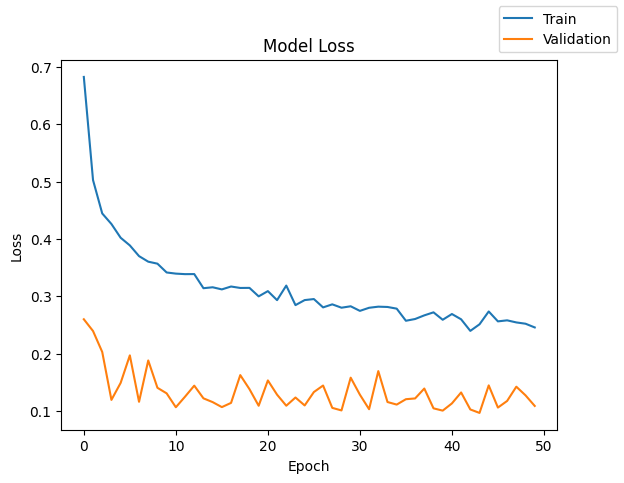

In [148]:
plot(history,'loss')

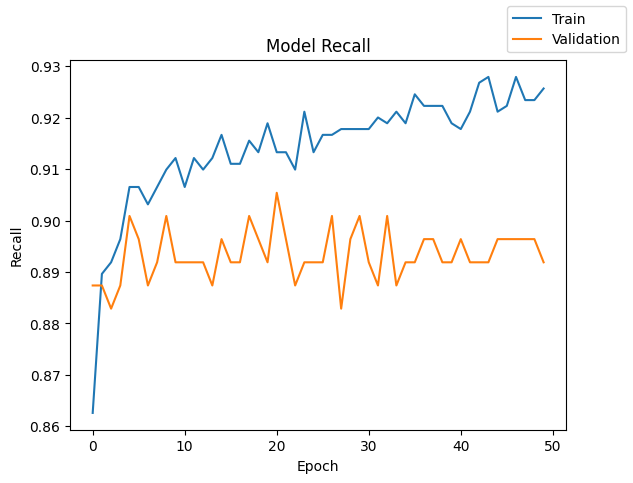

In [149]:
plot(history,'Recall')

****

In [150]:
model_4_train_perf = model_performance_classification(model_4, x_train, y_train) #threshold = 0.5
print("Model 4 Train Performance")
print(model_4_train_perf)
print("-"*50)
print("Model 4 Validation Performance")
model_4_val_perf = model_performance_classification(model_4,x_val,y_val)
print(model_4_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 147us/step
Model 4 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.989812  0.961218   0.943856  0.952347
--------------------------------------------------
Model 4 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 162us/step
   Accuracy    Recall  Precision  F1 Score
0    0.9875  0.942505   0.938786  0.940637


In [151]:
#let's get classification report on y train and y val for Model 4
y_train_pred_4 = model_4.predict(x_train)
y_val_pred_4 = model_4.predict(x_val)
print("Classification Report - Train data Model_4",end="\n\n")
cr_train_model_4 = classification_report(y_train,y_train_pred_4>0.5)
print(cr_train_model_4)
print("Classification Report - Validation data Model_4",end="\n\n")
cr_val_model_4 = classification_report(y_val,y_val_pred_4>0.5)
print(cr_val_model_4)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 176us/step
Classification Report - Train data Model_4

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15112
           1       0.89      0.93      0.91       888

    accuracy                           0.99     16000
   macro avg       0.94      0.96      0.95     16000
weighted avg       0.99      0.99      0.99     16000

Classification Report - Validation data Model_4

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3778
           1       0.88      0.89      0.89       222

    accuracy                           0.99      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.99      0.99      0.99      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step


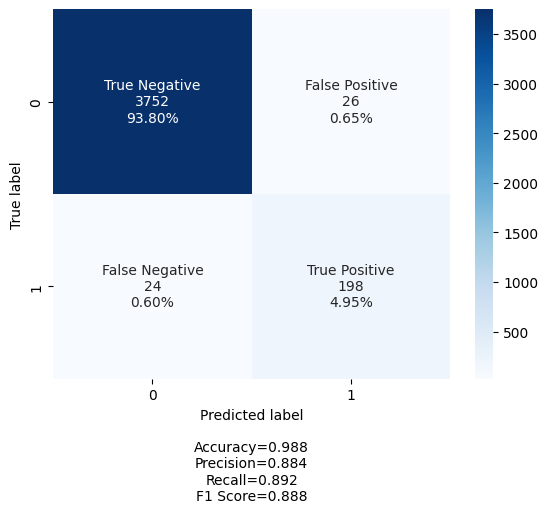

In [152]:
# Predict probabilities using confusion matrix 
y_pred = model_4.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [153]:
results.loc[4] = [3,[128,64,64],["relu","relu","relu"],50,32,"sgd",[0.01, "-"],"Xavier - CW ","dropout(0.3)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [154]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -              -    0.028434         0.055182      0.902027           0.869369         7.70
2                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56
4                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]       Xavier - CW    dropout(0.3)    0.245499         0.108515      0.925676           0.891892         8.46

### **Observations**

1. Applying class weights to handle the imbalance dataset, the recall improved.
2. The False Positive class (type 1 Error) increased form 0.07% to 0.95% , this shows applying class weights impvoed the model.
3. Both Train and Validation recall has increased compared to previous model.
4. We also see significant oscillation in both Train and validation recall, which might suggest instability in the learning process
    * Lets introduce some momentum to increase the magnitude of weight updates 
    * then we might move to another Optimizer ,Adam and try for smoother reclal curves, faster convergence and better handling of sparse gradient and class imbalance  
    * We might also try Batch Normalization to stabalize and standardized activation ,reducing internal convaiate shift . this will help to reduce oscillations and may imporve the recall
       

## Model 5

In [155]:
#clear current keras session
tf.keras.backend.clear_session()

In [156]:
# initializing the neural network
model_5 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_5.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_5.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_5.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_5.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_5.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [157]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
#SGD Optiomizer
mom = 0.3
optimizer = keras.optimizers.SGD(momentum=mom)    # defining SGD as the optimizer to be used
model_5.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [159]:
start = time.time()
history = model_5.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - Recall: 0.8293 - loss: 0.8449 - val_Recall: 0.8874 - val_loss: 0.2408
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - Recall: 0.8989 - loss: 0.4688 - val_Recall: 0.8874 - val_loss: 0.2295
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - Recall: 0.8926 - loss: 0.4525 - val_Recall: 0.8829 - val_loss: 0.1341
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - Recall: 0.8897 - loss: 0.4305 - val_Recall: 0.9009 - val_loss: 0.1757
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - Recall: 0.9030 - loss: 0.4031 - val_Recall: 0.8829 - val_loss: 0.1624
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - Recall: 0.9040 - loss: 0.3513 - val_Recall: 0.9009 - val_loss: 0.1511
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - Recall: 0.9079 - loss: 0.3484 - val_Recall: 0.8829 - val_loss: 0.1854
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - Recall: 0.8962 - loss: 0.3684 - val_Recall: 0.8784 - val_loss:

In [160]:
print("Time taken in seconds ",end-start)

Time taken in seconds  8.886943817138672


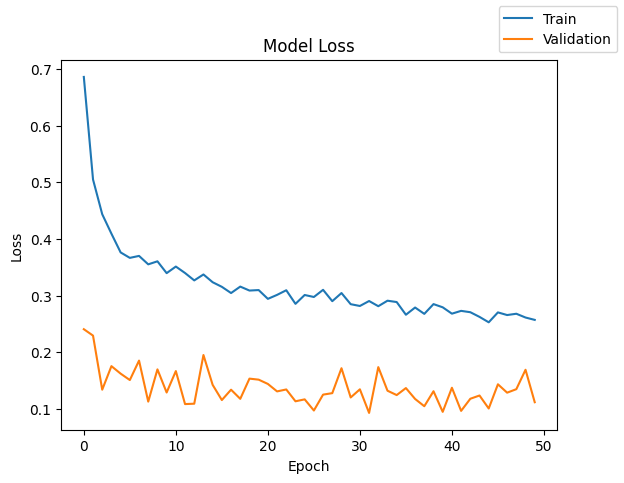

In [161]:
plot(history,'loss')

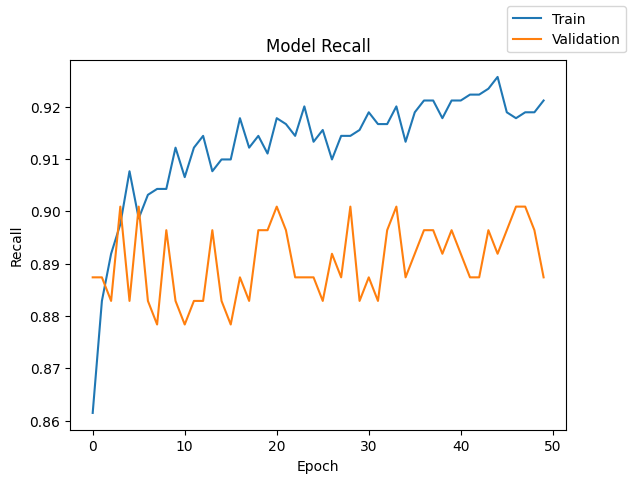

In [162]:
plot(history,'Recall')

****

In [163]:
model_5_train_perf = model_performance_classification(model_5, x_train, y_train) #threshold = 0.5
print("Model 5 Train Performance")
print(model_5_train_perf)
print("-"*50)
print("Model 5 Validation Performance")
model_5_val_perf = model_performance_classification(model_5,x_val,y_val)
print(model_5_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 144us/step
Model 5 Train Performance
   Accuracy    Recall  Precision  F1 Score
0    0.9915  0.962642   0.956836  0.959718
--------------------------------------------------
Model 5 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step
   Accuracy    Recall  Precision  F1 Score
0   0.98825  0.940782   0.946466  0.943603


In [164]:
#let's get classification report on y train and y val for Model 5
y_train_pred_5 = model_5.predict(x_train)
y_val_pred_5 = model_5.predict(x_val)
print("Classification Report - Train data Model_5",end="\n\n")
cr_train_model_5 = classification_report(y_train,y_train_pred_5>0.5)
print(cr_train_model_5)
print("Classification Report - Validation data Model_5",end="\n\n")
cr_val_model_5 = classification_report(y_val,y_val_pred_5>0.5)
print(cr_val_model_5)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 150us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step
Classification Report - Train data Model_5

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15112
           1       0.92      0.93      0.92       888

    accuracy                           0.99     16000
   macro avg       0.96      0.96      0.96     16000
weighted avg       0.99      0.99      0.99     16000

Classification Report - Validation data Model_5

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3778
           1       0.90      0.89      0.89       222

    accuracy                           0.99      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.99      0.99      0.99      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step


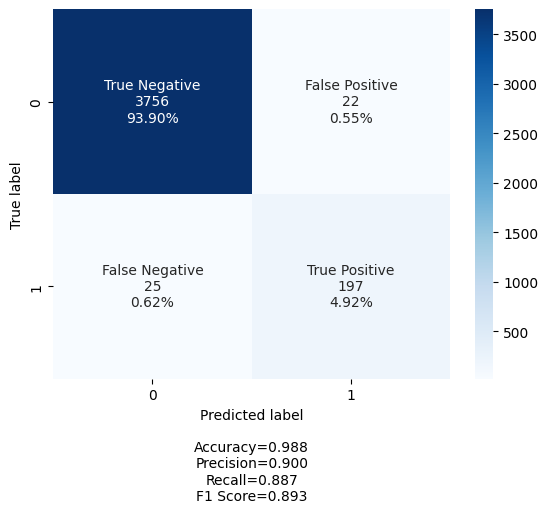

In [165]:
# Predict probabilities using confusion matrix 
y_pred = model_5.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [166]:
results.loc[5] = [3,[128,64,64],["relu","relu","relu"],50,32,"sgd",[0.01, "0.3"],"Xavier - CW ","dropout(0.3)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [167]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -              -    0.028434         0.055182      0.902027           0.869369         7.70
2                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56
4                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]       Xavier - CW    dropout(0.3)    0.245499         0.108515      0.925676           0.891892         8.46
5                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd             [0.01, 0.3]       Xavier - CW    dropout(0.3)    0.257260         0.112013      0.921171           0.887387         8.89

### **Observations**

1. Applying momentum 0.3 does not yeild better recall than previous model.
2. Train recall improves steadily and remains high (>0.92), but shows some fluctuation, especially in later epochs.
3. Validation recall is more noisy and oscillates frequently around 0.88–0.89, indicating instability in learning generalizable patterns.
4. Validation recall needs to be improved:
   * We know SGD is very sensitive to learning rate with momentum and often causes oscillation, hence we will now switch to Adam Optimizer which adapts learning rate for each paramter and is more stable 
       

## Model 6
With Adam Optimizer

In [168]:
#clear current keras session
tf.keras.backend.clear_session()

In [169]:
# initializing the neural network
model_6 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_6.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_6.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_6.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_6.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_6.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [170]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
#Adam Optiomizer 
lr = 0.001
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining SGD as the optimizer to be used
model_6.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [172]:
start = time.time()
history = model_6.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - Recall: 0.7646 - loss: 0.8452 - val_Recall: 0.8784 - val_loss: 0.1619
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - Recall: 0.8737 - loss: 0.5518 - val_Recall: 0.8919 - val_loss: 0.1525
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - Recall: 0.9103 - loss: 0.4068 - val_Recall: 0.8784 - val_loss: 0.1448
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - Recall: 0.8930 - loss: 0.4071 - val_Recall: 0.8829 - val_loss: 0.1281
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - Recall: 0.9028 - loss: 0.3705 - val_Recall: 0.8874 - val_loss: 0.1164
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - Recall: 0.9094 - loss: 0.3289 - val_Recall: 0.8829 - val_loss: 0.1183
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - Recall: 0.9139 - loss: 0.3585 - val_Recall: 0.8874 - val_loss: 0.1834
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - Recall: 0.9016 - loss: 0.3636 - val_Recall: 0.8874 - val_loss:

In [173]:
print("Time taken in seconds ",end-start)

Time taken in seconds  9.925749063491821


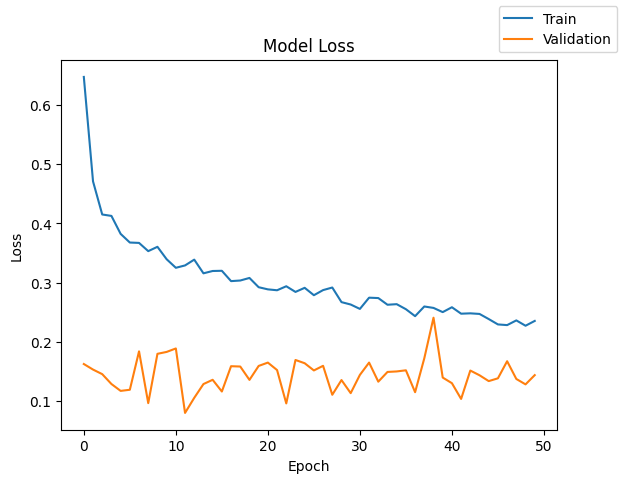

In [174]:
plot(history,'loss')

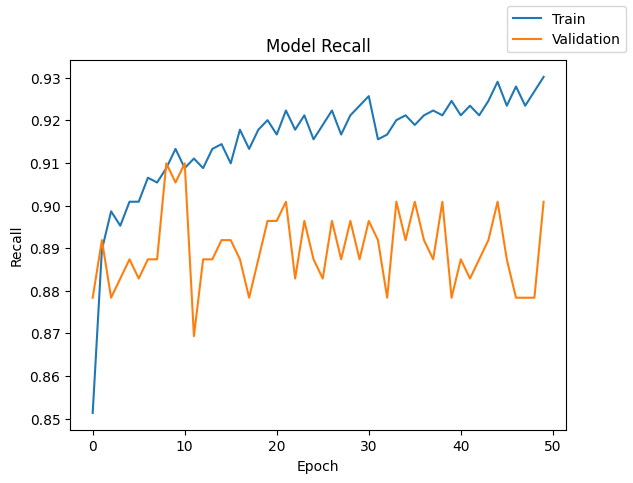

In [175]:
plot(history,'Recall')

In [176]:
model_6_train_perf = model_performance_classification(model_6, x_train, y_train) #threshold = 0.5
print("Model 6 Train Performance")
print(model_6_train_perf)
print("-"*50)
print("Model 6 Validation Performance")
model_6_val_perf = model_performance_classification(model_6,x_val,y_val)
print(model_6_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step
Model 6 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.987125  0.966685   0.919863  0.941851
--------------------------------------------------
Model 6 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step
   Accuracy    Recall  Precision  F1 Score
0    0.9825  0.944098   0.900294  0.920884


In [177]:
#let's get classification report on y train and y val for Model 5
y_train_pred_6 = model_6.predict(x_train)
y_val_pred_6 = model_6.predict(x_val)
print("Classification Report - Train data Model_6",end="\n\n")
cr_train_model_6 = classification_report(y_train,y_train_pred_6>0.5)
print(cr_train_model_6)
print("Classification Report - Validation data Model_6",end="\n\n")
cr_val_model_6 = classification_report(y_val,y_val_pred_6>0.5)
print(cr_val_model_6)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step
Classification Report - Train data Model_6

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15112
           1       0.84      0.94      0.89       888

    accuracy                           0.99     16000
   macro avg       0.92      0.97      0.94     16000
weighted avg       0.99      0.99      0.99     16000

Classification Report - Validation data Model_6

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3778
           1       0.81      0.90      0.85       222

    accuracy                           0.98      4000
   macro avg       0.90      0.94      0.92      4000
weighted avg       0.98      0.98      0.98      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step


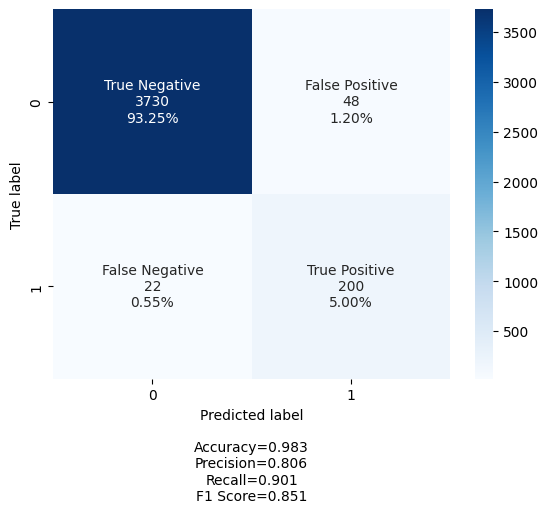

In [178]:
# Predict probabilities using confusion matrix 
y_pred = model_6.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [179]:
results.loc[6] = [3,[128,64,64],["relu","relu","relu"],50,32,"adam",[0.001, "-"],"Xavier - CW ","dropout(0.3)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [180]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -              -    0.028434         0.055182      0.902027           0.869369         7.70
2                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56
4                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]       Xavier - CW    dropout(0.3)    0.245499         0.108515      0.925676           0.891892         8.46
5                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd             [0.01, 0.3]       Xavier - CW    dropout(0.3)    0.257260         0.112013      0.921171           0.887387         8.89
6                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [0.001, -]       Xavier - CW    dropout(0.3)    0.234939         0.143119      0.930180           0.900901         9.93

### **Observations**

1. Switching to Adam Optimizer with lr = 0.001 slightly improved  a recall for both Train and Validation
2. Oscillation still present, this means model is still struggling to find its local minima
4. Adam adaptively learns the learning rate but remains dependent on its initial value, lets try decreasing the learning rate 

## Model 7

In [181]:
#clear current keras session
tf.keras.backend.clear_session()

In [182]:
# initializing the neural network
model_7 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_7.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_7.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_7.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_7.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_7.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [183]:
model_7.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
#Adam Optiomizer 
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining SGD as the optimizer to be used
model_7.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [185]:
start = time.time()
history = model_7.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - Recall: 0.3989 - loss: 1.6584 - val_Recall: 0.8784 - val_loss: 0.3903
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - Recall: 0.8562 - loss: 0.7610 - val_Recall: 0.8919 - val_loss: 0.2993
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - Recall: 0.8832 - loss: 0.6718 - val_Recall: 0.8964 - val_loss: 0.2529
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - Recall: 0.8999 - loss: 0.5691 - val_Recall: 0.8874 - val_loss: 0.1933
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - Recall: 0.8809 - loss: 0.5674 - val_Recall: 0.8919 - val_loss: 0.1943
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - Recall: 0.9027 - loss: 0.4760 - val_Recall: 0.8919 - val_loss: 0.1733
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - Recall: 0.8943 - loss: 0.5174 - val_Recall: 0.8919 - val_loss: 0.1634
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - Recall: 0.8815 - loss: 0.4944 - val_Recall: 0.8919 - val_loss:

In [186]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.007179021835327


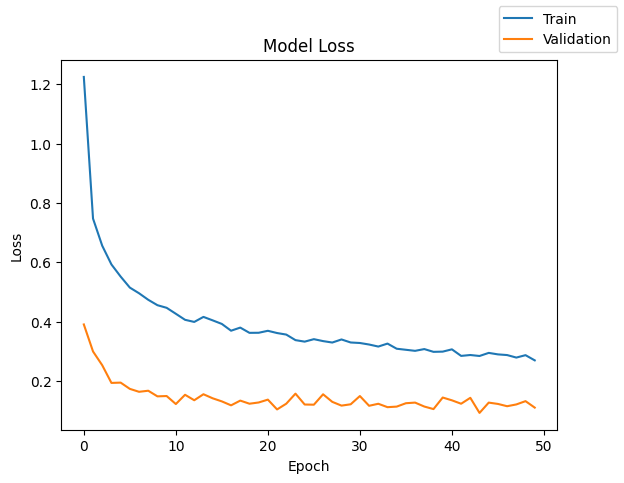

In [187]:
plot(history,'loss')

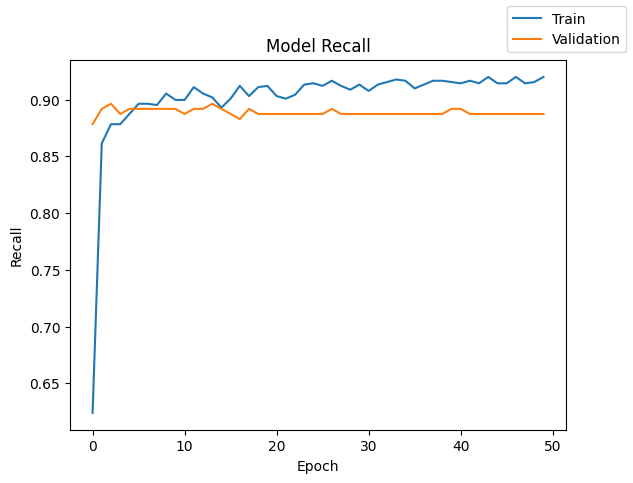

In [188]:
plot(history,'Recall')

In [189]:
model_7_train_perf = model_performance_classification(model_7, x_train, y_train) #threshold = 0.5
print("Model 7 Train Performance")
print(model_7_train_perf)
print("-"*50)
print("Model 7 Validation Performance")
model_7_val_perf = model_performance_classification(model_7,x_val,y_val)
print(model_7_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 145us/step
Model 7 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.989313  0.958304   0.941949  0.949956
--------------------------------------------------
Model 7 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step
   Accuracy    Recall  Precision  F1 Score
0   0.98725  0.940253   0.938395  0.939321


In [190]:
#let's get classification report on y train and y val for Model 7
y_train_pred_7 = model_7.predict(x_train)
y_val_pred_7 = model_7.predict(x_val)
print("Classification Report - Train data Model_7",end="\n\n")
cr_train_model_7 = classification_report(y_train,y_train_pred_7>0.5)
print(cr_train_model_7)
print("Classification Report - Validation data Model_7",end="\n\n")
cr_val_model_7 = classification_report(y_val,y_val_pred_7>0.5)
print(cr_val_model_7)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 148us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 174us/step
Classification Report - Train data Model_7

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15112
           1       0.89      0.92      0.91       888

    accuracy                           0.99     16000
   macro avg       0.94      0.96      0.95     16000
weighted avg       0.99      0.99      0.99     16000

Classification Report - Validation data Model_7

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3778
           1       0.88      0.89      0.89       222

    accuracy                           0.99      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.99      0.99      0.99      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step


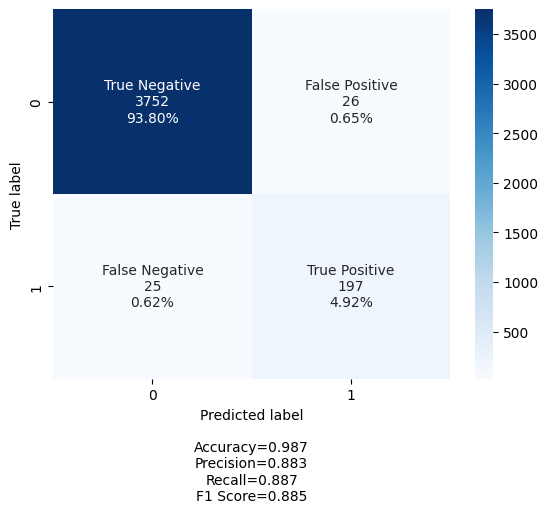

In [191]:
# Predict probabilities using confusion matrix 
y_pred = model_7.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [192]:
results.loc[7] = [3,[128,64,64],["relu","relu","relu"],50,32,"adam",[1e-04, "-"],"Xavier - CW ","dropout(0.3)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [193]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -              -    0.028434         0.055182      0.902027           0.869369         7.70
2                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56
4                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]       Xavier - CW    dropout(0.3)    0.245499         0.108515      0.925676           0.891892         8.46
5                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd             [0.01, 0.3]       Xavier - CW    dropout(0.3)    0.257260         0.112013      0.921171           0.887387         8.89
6                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [0.001, -]       Xavier - CW    dropout(0.3)    0.234939         0.143119      0.930180           0.900901         9.93
7                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam             [0.0001, -]       Xavier - CW    dropout(0.3)    0.269328         0.110118      0.920045           0.887387        10.01

### **Observations**

1. Not a significant change in Recall for both train and validation an osciallation still persists, lets further decrease the learnign rate and see if it can reduce the oscillation

## Model 8

In [194]:
#clear current keras session
tf.keras.backend.clear_session()

In [195]:
# initializing the neural network
model_8 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_8.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_8.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_8.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_8.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_8.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [196]:
model_8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [197]:
#Adam Optiomizer 
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining SGD as the optimizer to be used
model_8.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [198]:
start = time.time()
history = model_8.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - Recall: 0.8998 - loss: 1.6624 - val_Recall: 0.7613 - val_loss: 0.6448
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - Recall: 0.7767 - loss: 1.2090 - val_Recall: 0.7523 - val_loss: 0.4872
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - Recall: 0.7361 - loss: 1.1025 - val_Recall: 0.7658 - val_loss: 0.4323
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - Recall: 0.7975 - loss: 0.9568 - val_Recall: 0.7793 - val_loss: 0.4050
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - Recall: 0.8031 - loss: 0.9381 - val_Recall: 0.7928 - val_loss: 0.3812
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - Recall: 0.7670 - loss: 0.9312 - val_Recall: 0.8153 - val_loss: 0.3619
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - Recall: 0.8061 - loss: 0.8524 - val_Recall: 0.8198 - val_loss: 0.3483
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - Recall: 0.8294 - loss: 0.8025 - val_Recall: 0.8243 - val_loss:

In [199]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.07526683807373


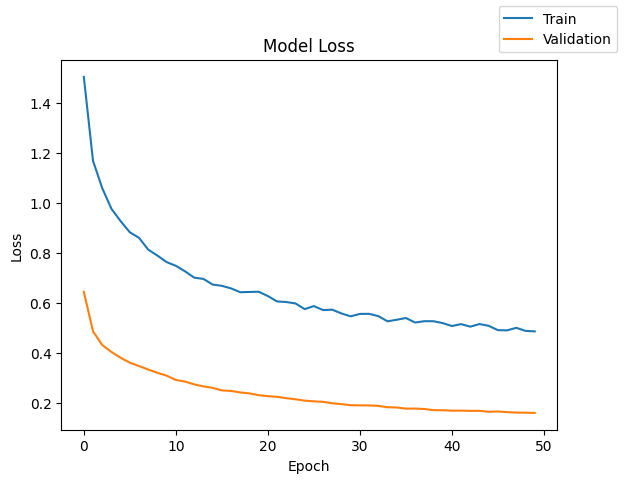

In [200]:
plot(history,'loss')

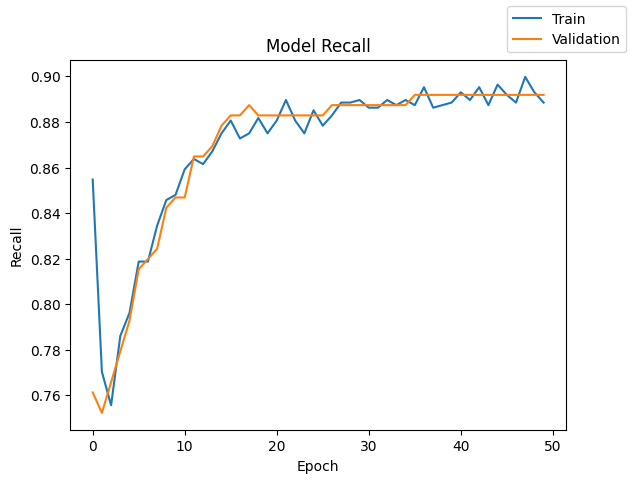

In [201]:
plot(history,'Recall')

In [202]:
model_8_train_perf = model_performance_classification(model_8, x_train, y_train) #threshold = 0.5
print("Model 8 Train Performance")
print(model_8_train_perf)
print("-"*50)
print("Model 8 Validation Performance")
model_8_val_perf = model_performance_classification(model_8,x_val,y_val)
print(model_8_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 144us/step
Model 8 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.971625  0.938341   0.840087  0.881904
--------------------------------------------------
Model 8 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step
   Accuracy    Recall  Precision  F1 Score
0      0.97  0.933241   0.833497  0.875704


In [203]:
#let's get classification report on y train and y val for Model 8
y_train_pred_8 = model_8.predict(x_train)
y_val_pred_8 = model_8.predict(x_val)
print("Classification Report - Train data Model_8",end="\n\n")
cr_train_model_8 = classification_report(y_train,y_train_pred_8>0.5)
print(cr_train_model_8)
print("Classification Report - Validation data Model_8",end="\n\n")
cr_val_model_8 = classification_report(y_val,y_val_pred_8>0.5)
print(cr_val_model_8)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 146us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step
Classification Report - Train data Model_8

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     15112
           1       0.69      0.90      0.78       888

    accuracy                           0.97     16000
   macro avg       0.84      0.94      0.88     16000
weighted avg       0.98      0.97      0.97     16000

Classification Report - Validation data Model_8

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3778
           1       0.67      0.89      0.77       222

    accuracy                           0.97      4000
   macro avg       0.83      0.93      0.88      4000
weighted avg       0.98      0.97      0.97      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step


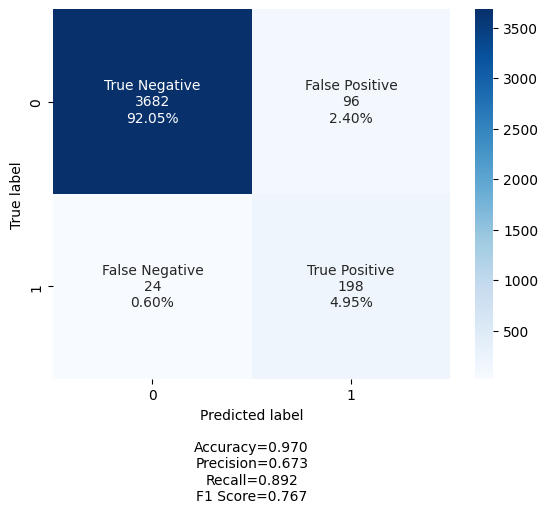

In [204]:
# Predict probabilities using confusion matrix 
y_pred = model_8.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [205]:
results.loc[8] = [3,[128,64,64],["relu","relu","relu"],50,32,"adam",[1e-5, "-"],"Xavier - CW ","dropout(0.3)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [206]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -              -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -              -    0.028434         0.055182      0.902027           0.869369         7.70
2                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -   dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56
4                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]       Xavier - CW    dropout(0.3)    0.245499         0.108515      0.925676           0.891892         8.46
5                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd             [0.01, 0.3]       Xavier - CW    dropout(0.3)    0.257260         0.112013      0.921171           0.887387         8.89
6                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [0.001, -]       Xavier - CW    dropout(0.3)    0.234939         0.143119      0.930180           0.900901         9.93
7                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam             [0.0001, -]       Xavier - CW    dropout(0.3)    0.269328         0.110118      0.920045           0.887387        10.01
8                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]       Xavier - CW    dropout(0.3)    0.486973         0.161076      0.888514           0.891892        10.08

### **Observations**

1. Switching to Adam Optimizer with lr = 1e-5  improved  the recall oscillation much for validation model
2. The Recall percaentage for both Train and validation is dropped but model is slightly overfit.
3. As per the model recall vs Epoch graph, we see the Validation recall converge with training ~30 epochs and stays flat with ~0.87-0.88 recall.
5. Lets try Batch Normalization and see how this helps in stablizing the neural netowrk for faster convergence 

## Model 9

In [207]:
#clear current keras session
tf.keras.backend.clear_session()

In [208]:
# initializing the neural network
model_9 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_9.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model_9.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_9.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_9.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_9.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_9.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_9.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_9.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [209]:
model_9.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,241 (71.25 KB)

 Non-trainable params: 512 (2.00 KB)

In [210]:
#Adam Optiomizer 
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining SGD as the optimizer to be used
model_9.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [211]:
start = time.time()
history = model_9.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - Recall: 0.3705 - loss: 2.4488 - val_Recall: 0.4775 - val_loss: 0.8437
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - Recall: 0.6144 - loss: 1.7520 - val_Recall: 0.7117 - val_loss: 0.7759
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - Recall: 0.6967 - loss: 1.4798 - val_Recall: 0.8288 - val_loss: 0.7253
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - Recall: 0.8097 - loss: 1.2481 - val_Recall: 0.8739 - val_loss: 0.6968
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - Recall: 0.8398 - loss: 1.1383 - val_Recall: 0.8829 - val_loss: 0.6541
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - Recall: 0.8642 - loss: 1.0938 - val_Recall: 0.8964 - val_loss: 0.6321
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - Recall: 0.8417 - loss: 1.0768 - val_Recall: 0.9144 - val_loss: 0.6081
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - Recall: 0.8956 - loss: 1.0049 - val_Recall: 0.9189 - val_loss:

In [212]:
print("Time taken in seconds ",end-start)

Time taken in seconds  12.271375179290771


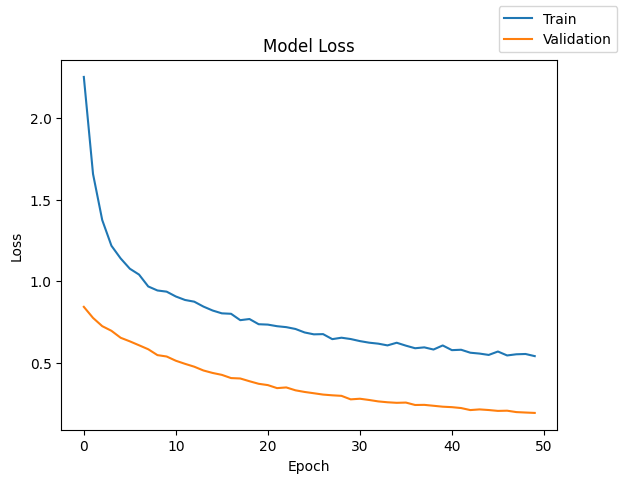

In [213]:
plot(history,'loss')

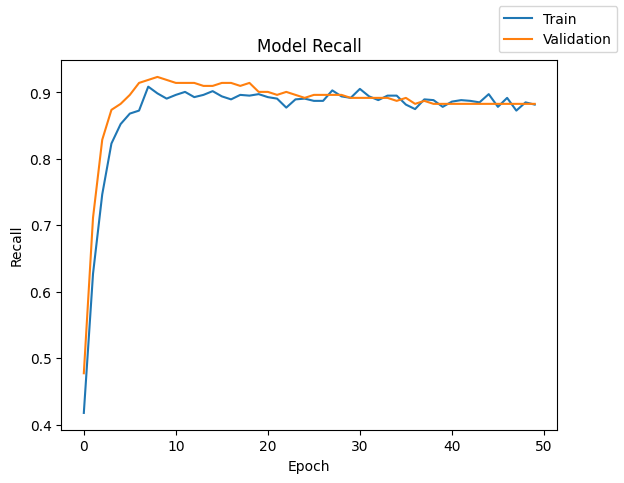

In [214]:
plot(history,'Recall')

In [215]:
model_9_train_perf = model_performance_classification(model_9, x_train, y_train) #threshold = 0.5
print("Model 8 Train Performance")
print(model_9_train_perf)
print("-"*50)
print("Model 9 Validation Performance")
model_9_val_perf = model_performance_classification(model_9,x_val,y_val)
print(model_9_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step
Model 8 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.968812  0.938972   0.826937  0.873239
--------------------------------------------------
Model 9 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step
   Accuracy    Recall  Precision  F1 Score
0   0.96425  0.925957   0.809573  0.856777


In [216]:
#let's get classification report on y train and y val for Model 9
y_train_pred_9 = model_9.predict(x_train)
y_val_pred_9 = model_9.predict(x_val)
print("Classification Report - Train data Model_9",end="\n\n")
cr_train_model_9 = classification_report(y_train,y_train_pred_9>0.5)
print(cr_train_model_9)
print("Classification Report - Validation data Model_9",end="\n\n")
cr_val_model_9 = classification_report(y_val,y_val_pred_9>0.5)
print(cr_val_model_9)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step
Classification Report - Train data Model_9

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15112
           1       0.66      0.91      0.76       888

    accuracy                           0.97     16000
   macro avg       0.83      0.94      0.87     16000
weighted avg       0.98      0.97      0.97     16000

Classification Report - Validation data Model_9

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3778
           1       0.63      0.88      0.73       222

    accuracy                           0.96      4000
   macro avg       0.81      0.93      0.86      4000
weighted avg       0.97      0.96      0.97      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step


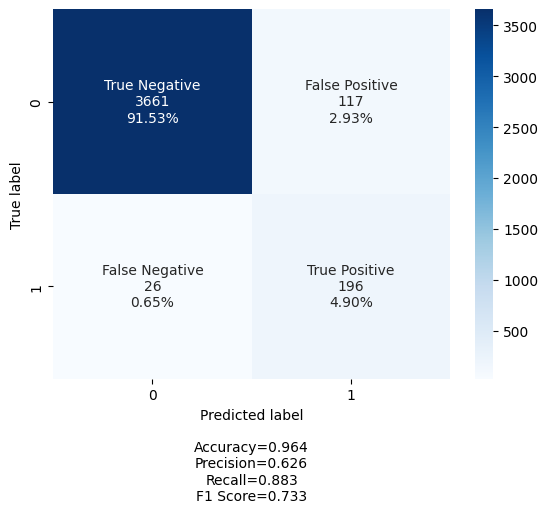

In [217]:
# Predict probabilities using confusion matrix 
y_pred = model_9.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [218]:
results.loc[9] = [3,[128,64,64],["relu","relu","relu"],50,32,"adam",[1e-5, "-"],"Xavier - CW ","dropout(0.3) + Batch Norm",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [219]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer             regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -                          -    0.040534         0.059940      0.861486           0.851351         6.92
1                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -                          -    0.028434         0.055182      0.902027           0.869369         7.70
2                2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -               dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -               dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56
4                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]       Xavier - CW                dropout(0.3)    0.245499         0.108515      0.925676           0.891892         8.46
5                3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd             [0.01, 0.3]       Xavier - CW                dropout(0.3)    0.257260         0.112013      0.921171           0.887387         8.89
6                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [0.001, -]       Xavier - CW                dropout(0.3)    0.234939         0.143119      0.930180           0.900901         9.93
7                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam             [0.0001, -]       Xavier - CW                dropout(0.3)    0.269328         0.110118      0.920045           0.887387        10.01
8                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]       Xavier - CW                dropout(0.3)    0.486973         0.161076      0.888514           0.891892        10.08
9                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]       Xavier - CW   dropout(0.3) + Batch Norm    0.541462         0.193208      0.881757           0.882883        12.27

### **Observations**

1. Using  Batch Norm regularization technique , both train and validation recall are ~90%
2. Convergence also occured in early Epochs and near 50th Epochs graphs shows trend on converging
4. The Learning time has although increased and this is due to applying batch nrom after every dense layer .
5. Before we conclude, lets try to use a He_normal Weight initializer for the above model and see the outcomes 

## Model 10

In [220]:
#clear current keras session
tf.keras.backend.clear_session()

In [221]:
# initializing the neural network
model_10 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_10.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_10.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_10.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_10.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_10.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_10.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_10.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_10.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [222]:
model_10.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,241 (71.25 KB)

 Non-trainable params: 512 (2.00 KB)

In [223]:
#Adam Optiomizer 
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining SGD as the optimizer to be used
model_10.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [224]:
start = time.time()
history = model_10.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - Recall: 0.5208 - loss: 1.6560 - val_Recall: 0.7072 - val_loss: 0.6930
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - Recall: 0.6555 - loss: 1.4446 - val_Recall: 0.7793 - val_loss: 0.6734
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - Recall: 0.7235 - loss: 1.2980 - val_Recall: 0.8288 - val_loss: 0.6470
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - Recall: 0.7922 - loss: 1.2102 - val_Recall: 0.8514 - val_loss: 0.6222
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - Recall: 0.8333 - loss: 1.1184 - val_Recall: 0.8559 - val_loss: 0.6029
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - Recall: 0.8218 - loss: 1.1295 - val_Recall: 0.8739 - val_loss: 0.5852
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - Recall: 0.8698 - loss: 1.0220 - val_Recall: 0.8739 - val_loss: 0.5707
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - Recall: 0.8829 - loss: 0.9907 - val_Recall: 0.8739 - val_loss:

In [225]:
print("Time taken in seconds ",end-start)

Time taken in seconds  12.212008953094482


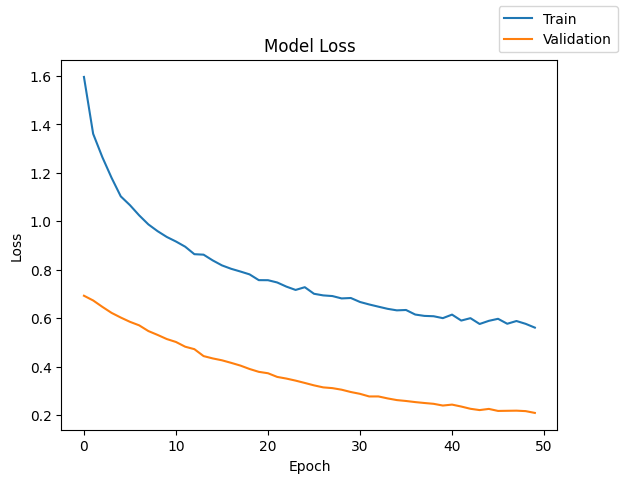

In [226]:
plot(history,'loss')

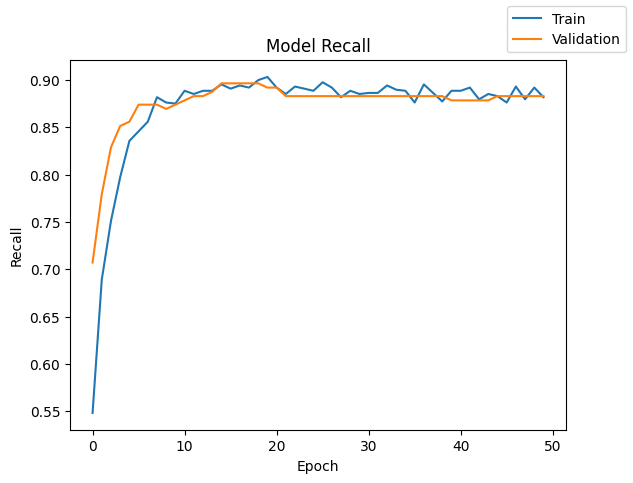

In [227]:
plot(history,'Recall')

In [228]:
model_10_train_perf = model_performance_classification(model_10, x_train, y_train) #threshold = 0.5
print("Model 10 Train Performance")
print(model_10_train_perf)
print("-"*50)
print("Model 10 Validation Performance")
model_10_val_perf = model_performance_classification(model_10,x_val,y_val)
print(model_10_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step
Model 10 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.956187  0.930699   0.780056  0.836005
--------------------------------------------------
Model 10 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
   Accuracy    Recall  Precision  F1 Score
0   0.95275  0.919869    0.76941  0.824612


In [229]:
#let's get classification report on y train and y val for Model 10
y_train_pred_10 = model_10.predict(x_train)
y_val_pred_10 = model_10.predict(x_val)
print("Classification Report - Train data Model_10",end="\n\n")
cr_train_model_10 = classification_report(y_train,y_train_pred_10>0.5)
print(cr_train_model_10)
print("Classification Report - Validation data Model_10",end="\n\n")
cr_val_model_10 = classification_report(y_val,y_val_pred_10>0.5)
print(cr_val_model_10)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 164us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
Classification Report - Train data Model_10

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     15112
           1       0.57      0.90      0.70       888

    accuracy                           0.96     16000
   macro avg       0.78      0.93      0.84     16000
weighted avg       0.97      0.96      0.96     16000

Classification Report - Validation data Model_10

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3778
           1       0.55      0.88      0.67       222

    accuracy                           0.95      4000
   macro avg       0.77      0.92      0.82      4000
weighted avg       0.97      0.95      0.96      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step


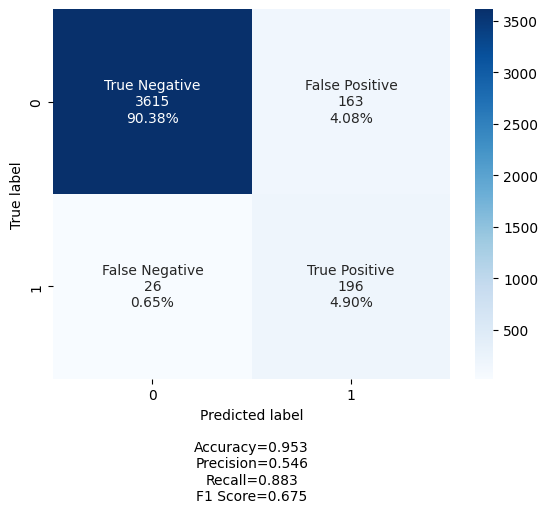

In [230]:
# Predict probabilities using confusion matrix 
y_pred = model_10.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [231]:
results.loc[10] = [3,[128,64,64],["relu","relu","relu"],50,32,"adam",[1e-5, "-"],"He Normal - CW ","dropout(0.3) + Batch Norm",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [232]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer             regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                 1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -                          -    0.040534         0.059940      0.861486           0.851351         6.92
1                 2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -                          -    0.028434         0.055182      0.902027           0.869369         7.70
2                 2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -               dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                 3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -               dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56
4                 3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]       Xavier - CW                dropout(0.3)    0.245499         0.108515      0.925676           0.891892         8.46
5                 3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd             [0.01, 0.3]       Xavier - CW                dropout(0.3)    0.257260         0.112013      0.921171           0.887387         8.89
6                 3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [0.001, -]       Xavier - CW                dropout(0.3)    0.234939         0.143119      0.930180           0.900901         9.93
7                 3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam             [0.0001, -]       Xavier - CW                dropout(0.3)    0.269328         0.110118      0.920045           0.887387        10.01
8                 3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]       Xavier - CW                dropout(0.3)    0.486973         0.161076      0.888514           0.891892        10.08
9                 3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]       Xavier - CW   dropout(0.3) + Batch Norm    0.541462         0.193208      0.881757           0.882883        12.27
10                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]    He Normal - CW   dropout(0.3) + Batch Norm    0.561231         0.209055      0.881757           0.882883        12.21

### **Observations**

1. Posting switching to he_normal weight initializer, we see not a significant change in recall compared to Model 9
2. Lets try Model 9 with callbacks :
   * Using Learning rate scheduler : this is to reduce the LR when performance plateaus
   * Using early stopping : this is avoid unnecessary overfitting and oscillation in later epochs

## Model 11 - reduce learning rate and early stopping

In [233]:
#clear current keras session
tf.keras.backend.clear_session()

In [234]:
# initializing the neural network
#chanig the weight initializer back to Xavier or glorot_normal
model_11 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_11.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1],kernel_initializer='glorot_normal'))
model_11.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_11.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_11.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_11.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_11.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_11.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_11.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [235]:
model_11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,241 (71.25 KB)

 Non-trainable params: 512 (2.00 KB)

In [236]:
#Adam Optiomizer 
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining SGD as the optimizer to be used
model_11.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [237]:
#callbacks to reduce osciallation and overfitting
from keras.callbacks import ReduceLROnPlateau, EarlyStopping 
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6) #learnign schedule
early_stop = EarlyStopping(monitor='val_Recall',mode='max', patience=10, restore_best_weights=True)  #early stopping

start = time.time()
history = model_11.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, 
                       epochs=epochs,class_weight=cw_dict,callbacks=[lr_schedule,early_stop])
end=time.time()

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - Recall: 0.2812 - loss: 2.2647 - val_Recall: 0.3018 - val_loss: 0.7829 - learning_rate: 1.0000e-05
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - Recall: 0.5273 - loss: 1.7191 - val_Recall: 0.5495 - val_loss: 0.7215 - learning_rate: 1.0000e-05
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - Recall: 0.6522 - loss: 1.5047 - val_Recall: 0.6982 - val_loss: 0.6891 - learning_rate: 1.0000e-05
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - Recall: 0.7554 - loss: 1.2881 - val_Recall: 0.8153 - val_loss: 0.6747 - learning_rate: 1.0000e-05
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - Recall: 0.7987 - loss: 1.2433 - val_Recall: 0.8514 - val_loss: 0.6460 - learning_rate: 1.0000e-05
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - Recall: 0.8683 - loss: 1.0970 - val_Recall: 0.8874 - val_loss: 0.6231 - learning_rate: 1.0000e-05
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - Recall: 0.8482 - los

In [238]:
print("Time taken in seconds ",end-start)

Time taken in seconds  6.189470052719116


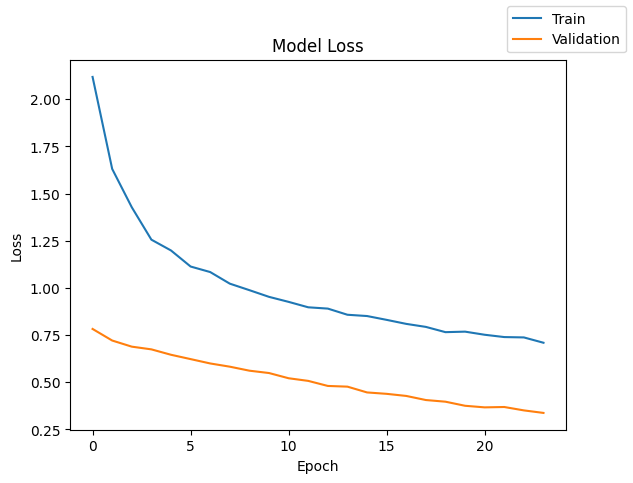

In [239]:
plot(history,'loss')

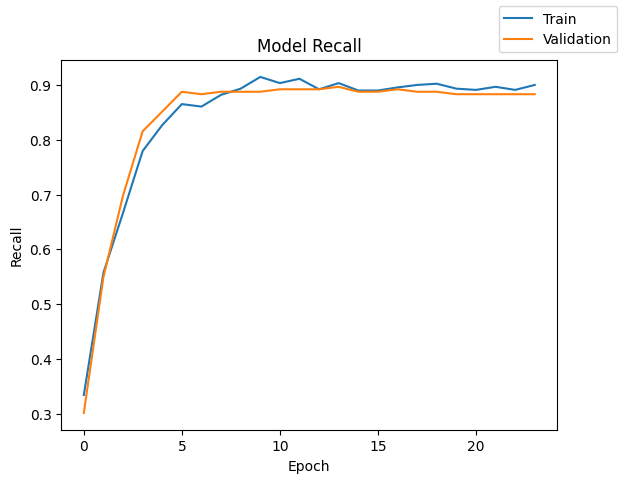

In [240]:
plot(history,'Recall')

In [241]:
model_11_train_perf = model_performance_classification(model_11, x_train, y_train) #threshold = 0.5
print("Model 11 Train Performance")
print(model_11_train_perf)
print("-"*50)
print("Model 11 Validation Performance")
model_11_val_perf = model_performance_classification(model_11,x_val,y_val)
print(model_11_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 169us/step
Model 11 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.844375  0.875747    0.62253  0.652296
--------------------------------------------------
Model 11 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step
   Accuracy    Recall  Precision  F1 Score
0     0.837  0.864953   0.616544  0.642617


In [242]:
#let's get classification report on y train and y val for Model 11
y_train_pred_11 = model_11.predict(x_train)
y_val_pred_11 = model_11.predict(x_val)
print("Classification Report - Train data Model_11",end="\n\n")
cr_train_model_11 = classification_report(y_train,y_train_pred_11>0.5)
print(cr_train_model_11)
print("Classification Report - Validation data Model_11",end="\n\n")
cr_val_model_11 = classification_report(y_val,y_val_pred_11>0.5)
print(cr_val_model_11)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step
Classification Report - Train data Model_11

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     15112
           1       0.25      0.91      0.39       888

    accuracy                           0.84     16000
   macro avg       0.62      0.88      0.65     16000
weighted avg       0.95      0.84      0.88     16000

Classification Report - Validation data Model_11

              precision    recall  f1-score   support

           0       0.99      0.83      0.91      3778
           1       0.24      0.90      0.38       222

    accuracy                           0.84      4000
   macro avg       0.62      0.86      0.64      4000
weighted avg       0.95      0.84      0.88      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step


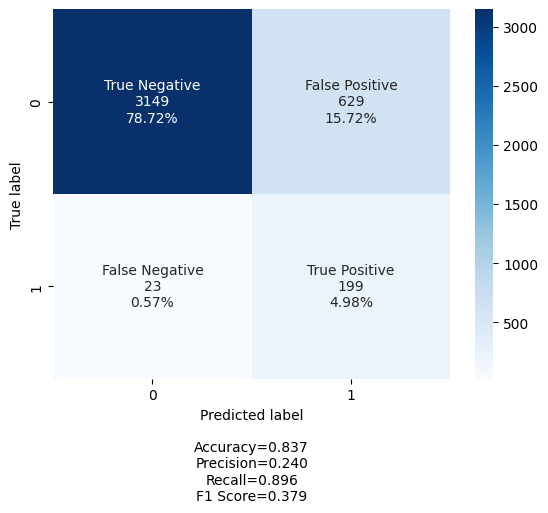

In [243]:
# Predict probabilities using confusion matrix 
y_pred = model_11.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


In [244]:
results.loc[11] = [3,[128,64,64],["relu","relu","relu"],50,32,"adam",[1e-5, "-"],"xavier - CW ","dropout(0.3) + Batch Norm + Callbacks[lr_schedule, early_stop]",history.history["loss"][-1],history.history["val_loss"][-1],history.history["Recall"][-1],history.history["val_Recall"][-1],round(end-start,2)]

In [245]:
results

# hidden layers # neurons - hidden layer activation function - hidden layer   # epochs  batch size optimizer learning rate, momentum weight initializer                                     regularization  train loss  validation loss  train recall  validation recall  time (secs)
0                 1                    [128]                              [relu]        50          32     [sgd]               [0.01, -]                  -                                                  -    0.040534         0.059940      0.861486           0.851351         6.92
1                 2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -                                                  -    0.028434         0.055182      0.902027           0.869369         7.70
2                 2                [128, 64]                        [relu, relu]        50          32       sgd               [0.01, -]                  -                                       dropout(0.5)    0.050771         0.056083      0.834459           0.855856         8.08
3                 3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]                  -                                       dropout(0.3)    0.038127         0.053664      0.880631           0.869369         8.56
4                 3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd               [0.01, -]       Xavier - CW                                        dropout(0.3)    0.245499         0.108515      0.925676           0.891892         8.46
5                 3            [128, 64, 64]                  [relu, relu, relu]        50          32       sgd             [0.01, 0.3]       Xavier - CW                                        dropout(0.3)    0.257260         0.112013      0.921171           0.887387         8.89
6                 3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [0.001, -]       Xavier - CW                                        dropout(0.3)    0.234939         0.143119      0.930180           0.900901         9.93
7                 3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam             [0.0001, -]       Xavier - CW                                        dropout(0.3)    0.269328         0.110118      0.920045           0.887387        10.01
8                 3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]       Xavier - CW                                        dropout(0.3)    0.486973         0.161076      0.888514           0.891892        10.08
9                 3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]       Xavier - CW                           dropout(0.3) + Batch Norm    0.541462         0.193208      0.881757           0.882883        12.27
10                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]    He Normal - CW                           dropout(0.3) + Batch Norm    0.561231         0.209055      0.881757           0.882883        12.21
11                3            [128, 64, 64]                  [relu, relu, relu]        50          32      adam              [1e-05, -]       xavier - CW   dropout(0.3) + Batch Norm + Callbacks[lr_sched...    0.709747         0.337831      0.899775           0.882883         6.19

### **Observations**

1. Posting switching to he_normal weight initializer, we see not a significant change in recall compared to Model 9
2. Lets try Model 9 with callbacks :
   * Using Learning rate scheduler : this is to reduce the LR when performance plateaus
   * Using early stopping : this is avoid unnecessary overfitting and oscillation in later epochs

## Model 12 - reduce learning rate 

In [246]:
#clear current keras session
tf.keras.backend.clear_session()

In [247]:
# initializing the neural network
#chanig the weight initializer back to Xavier or glorot_normal
model_12 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_12.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1],kernel_initializer='glorot_normal'))
model_12.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_12.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_12.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_12.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_12.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_12.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_12.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [248]:
model_12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,241 (71.25 KB)

 Non-trainable params: 512 (2.00 KB)

In [249]:
#Adam Optiomizer 
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining SGD as the optimizer to be used
model_12.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [250]:
#callbacks to reduce osciallation and overfitting

lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6) #learnign schedule


start = time.time()
history = model_12.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=64, 
                       epochs=epochs,class_weight=cw_dict,callbacks=[lr_schedule])
end=time.time()

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - Recall: 0.5377 - loss: 1.9114 - val_Recall: 0.6937 - val_loss: 0.8911 - learning_rate: 1.0000e-05
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - Recall: 0.6536 - loss: 1.6402 - val_Recall: 0.7928 - val_loss: 0.8866 - learning_rate: 1.0000e-05
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - Recall: 0.7294 - loss: 1.4604 - val_Recall: 0.8784 - val_loss: 0.8528 - learning_rate: 1.0000e-05
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - Recall: 0.7713 - loss: 1.3327 - val_Recall: 0.8964 - val_loss: 0.8126 - learning_rate: 1.0000e-05
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - Recall: 0.8010 - loss: 1.2428 - val_Recall: 0.9234 - val_loss: 0.7849 - learning_rate: 1.0000e-05
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - Recall: 0.8220 - loss: 1.1750 - val_Recall: 0.9279 - val_loss: 0.7682 - learning_rate: 1.0000e-05
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - Recall: 0.8547 - los

In [251]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.67601203918457


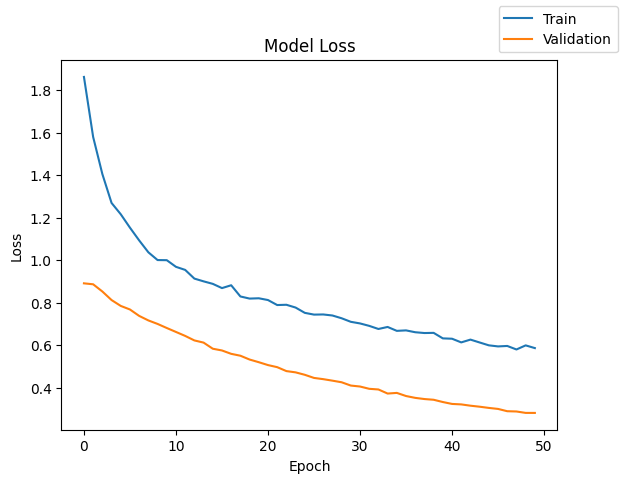

In [252]:
plot(history,'loss')

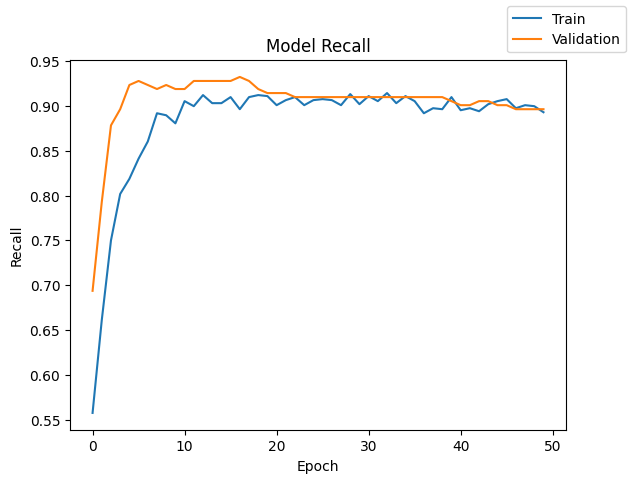

In [253]:
plot(history,'Recall')

In [254]:
model_12_train_perf = model_performance_classification(model_12, x_train, y_train) #threshold = 0.5
print("Model 12 Train Performance")
print(model_12_train_perf)
print("-"*50)
print("Model 12 Validation Performance")
model_12_val_perf = model_performance_classification(model_12,x_val,y_val)
print(model_12_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step
Model 12 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.946875  0.929479   0.753247  0.813266
--------------------------------------------------
Model 12 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
   Accuracy    Recall  Precision  F1 Score
0     0.943  0.921067   0.743089  0.802432


In [255]:
#let's get classification report on y train and y val for Model 12
y_train_pred_12 = model_12.predict(x_train)
y_val_pred_12 = model_12.predict(x_val)
print("Classification Report - Train data Model_12",end="\n\n")
cr_train_model_12 = classification_report(y_train,y_train_pred_12>0.5)
print(cr_train_model_12)
print("Classification Report - Validation data Model_12",end="\n\n")
cr_val_model_12 = classification_report(y_val,y_val_pred_12>0.5)
print(cr_val_model_12)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step
Classification Report - Train data Model_12

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15112
           1       0.51      0.91      0.66       888

    accuracy                           0.95     16000
   macro avg       0.75      0.93      0.81     16000
weighted avg       0.97      0.95      0.95     16000

Classification Report - Validation data Model_12

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3778
           1       0.49      0.90      0.64       222

    accuracy                           0.94      4000
   macro avg       0.74      0.92      0.80      4000
weighted avg       0.97      0.94      0.95      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step


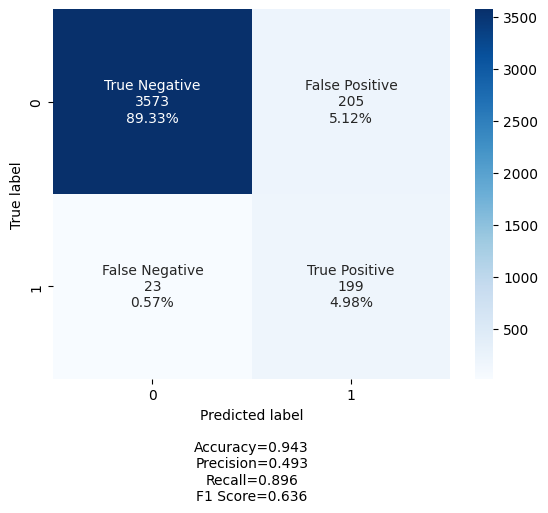

In [256]:
# Predict probabilities using confusion matrix 
y_pred = model_12.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


#### **Observation**
1. Removing early stopping from Model 12 and using only reduce learning rate increased the recall but precision is still around 50%
2. Hence, using the reduce learning rate does not have much significance.

## **Model 13**
With 0.3 threshold for prediction to see if the recall increases 

In [272]:
#clear current keras session
tf.keras.backend.clear_session()

In [273]:
# initializing the neural network
#chanig the weight initializer back to Xavier or glorot_normal
model_13 = Sequential()

# Adding a dense layer with ReLu activation function, with the input dimension determined by the shape of the training data.
model_13.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1],kernel_initializer='glorot_normal'))
model_13.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_13.add(Dropout(0.3))  # Adding 30% Dropout after first hidden layer
model_13.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_13.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_13.add(Dense(64, activation = 'relu'))  #Adding a dense layer with ReLu activation function
model_13.add(BatchNormalization()) # Adding Batch Normalization after Dense Layer
model_13.add(Dense(1,activation = 'sigmoid')) #adding output layer with sigmoid as the output is binary 1 or 0 

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [274]:
model_13.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,241 (71.25 KB)

 Non-trainable params: 512 (2.00 KB)

In [275]:
#Adam Optiomizer 
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)    # defining SGD as the optimizer to be used
model_13.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["Recall"])

In [276]:
#callbacks to reduce osciallation and overfitting

lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6) #learnign schedule


start = time.time()
history = model_13.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=64, 
                       epochs=epochs,class_weight=cw_dict,callbacks=[lr_schedule])
end=time.time()

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - Recall: 0.4774 - loss: 1.7069 - val_Recall: 0.6261 - val_loss: 0.7153 - learning_rate: 1.0000e-05
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - Recall: 0.6269 - loss: 1.4742 - val_Recall: 0.7477 - val_loss: 0.6806 - learning_rate: 1.0000e-05
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - Recall: 0.7155 - loss: 1.3133 - val_Recall: 0.8423 - val_loss: 0.6618 - learning_rate: 1.0000e-05
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - Recall: 0.7981 - loss: 1.2215 - val_Recall: 0.8829 - val_loss: 0.6404 - learning_rate: 1.0000e-05
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - Recall: 0.8406 - loss: 1.1414 - val_Recall: 0.8919 - val_loss: 0.6215 - learning_rate: 1.0000e-05
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - Recall: 0.8630 - loss: 1.0986 - val_Recall: 0.8874 - val_loss: 0.6118 - learning_rate: 1.0000e-05
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - Recall: 0.8772 - los

In [277]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.6471638679504395


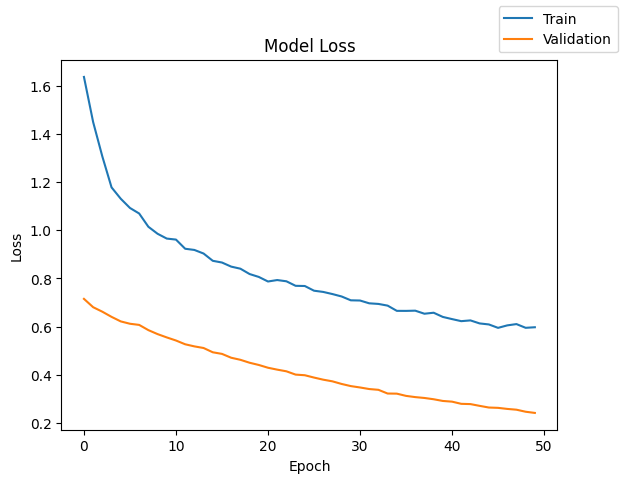

In [278]:
plot(history,'loss')

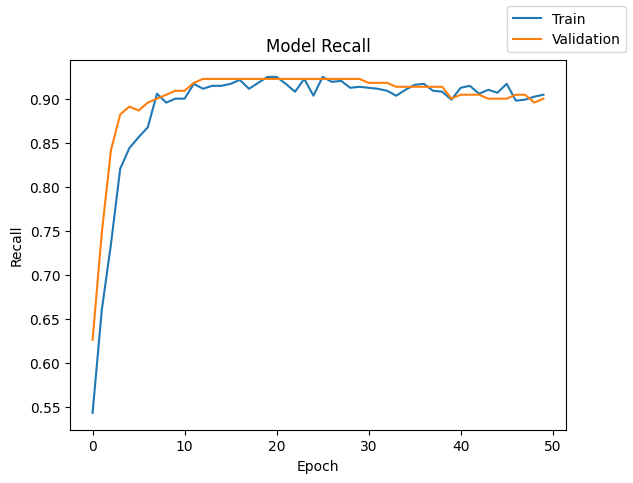

In [279]:
plot(history,'Recall')

In [280]:
model_13_train_perf = model_performance_classification(model_13, x_train, y_train) #threshold = 0.5
print("Model 13 Train Performance")
print(model_13_train_perf)
print("-"*50)
print("Model 13 Validation Performance")
model_13_val_perf = model_performance_classification(model_13,x_val,y_val)
print(model_13_val_perf)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step
Model 13 Train Performance
   Accuracy    Recall  Precision  F1 Score
0  0.953063  0.932224     0.7704  0.828555
--------------------------------------------------
Model 13 Validation Performance
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
   Accuracy    Recall  Precision  F1 Score
0    0.9515  0.927687   0.765785  0.823603


In [281]:
#let's get classification report on y train and y val for Model 13
y_train_pred_13 = model_13.predict(x_train)
y_val_pred_13 = model_13.predict(x_val)
print("Classification Report - Train data Model_13",end="\n\n")
cr_train_model_13 = classification_report(y_train,y_train_pred_13>0.3)
print(cr_train_model_13)
print("Classification Report - Validation data Model_13",end="\n\n")
cr_val_model_13 = classification_report(y_val,y_val_pred_13>0.3)
print(cr_val_model_13)

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
Classification Report - Train data Model_13

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     15112
           1       0.28      0.93      0.43       888

    accuracy                           0.86     16000
   macro avg       0.64      0.90      0.68     16000
weighted avg       0.96      0.86      0.90     16000

Classification Report - Validation data Model_13

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3778
           1       0.26      0.93      0.41       222

    accuracy                           0.85      4000
   macro avg       0.63      0.89      0.66      4000
weighted avg       0.95      0.85      0.89      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


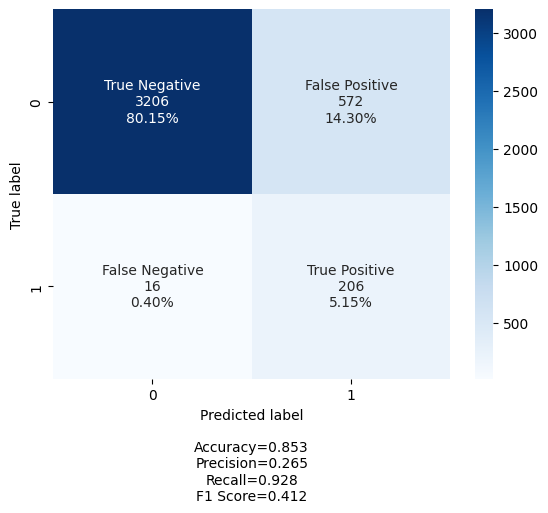

In [282]:
# Predict probabilities using confusion matrix 
y_pred = model_13.predict(x_val)
for i in range(len(y_val)):
    if y_pred[i]>0.3:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm = confusion_matrix(y_val,y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm,group_names=labels,cmap = "Blues")


#### **Observation**
1. Doing threhold tunning (updating output prediction model threhold from 0.5 to 0.3 ) , increased the recall to 93% but precision drastically decreased to 27% as per clasification report. Hence , not a significant model
   

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [283]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T,
        model_8_train_perf.T,
        model_9_train_perf.T,
        model_10_train_perf.T,
        model_11_train_perf.T,
        model_12_train_perf.T,
        model_13_train_perf.T
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
    "Model 7",
    "Model 8",
    "Model 9",
    "Model 10",
    "Model 11",
    "Model 12",
    "Model 13",
    
    
]
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5   Model 6   Model 7   Model 8   Model 9  Model 10  Model 11  Model 12  Model 13
Accuracy   0.992125  0.994437  0.992938  0.993750  0.989812  0.991500  0.987125  0.989313  0.971625  0.968812  0.956187  0.844375  0.946875  0.953063
Recall     0.934884  0.953597  0.941144  0.948463  0.961218  0.962642  0.966685  0.958304  0.938341  0.938972  0.930699  0.875747  0.929479  0.932224
Precision  0.989206  0.992995  0.990906  0.991422  0.943856  0.956836  0.919863  0.941949  0.840087  0.826937  0.780056  0.622530  0.753247  0.770400
F1 Score   0.960243  0.972370  0.964526  0.968834  0.952347  0.959718  0.941851  0.949956  0.881904  0.873239  0.836005  0.652296  0.813266  0.828555

#### Observation
Out of all the 13 models, the best few models on training dataset standpoint will be :
1. Model 6
2. Model 5
3. Model 4

In [284]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T,
        model_7_val_perf.T,
        model_8_val_perf.T,
        model_9_val_perf.T,
        model_10_val_perf.T,
        model_11_val_perf.T,
        model_12_val_perf.T,
        model_13_val_perf.T
        
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
    "Model 7",
    "Model 8",
    "Model 9",
    "Model 10",
    "Model 11",
    "Model 12",
    "Model 13"
    
    
]
print("Validation set performance comparison:")
models_val_comp_df

Validation set performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5   Model 6   Model 7   Model 8   Model 9  Model 10  Model 11  Model 12  Model 13
Accuracy   0.990000  0.991750  0.990250  0.991500  0.987500  0.988250  0.982500  0.987250  0.970000  0.964250  0.952750  0.837000  0.943000  0.951500
Recall     0.924749  0.934155  0.927002  0.934023  0.942505  0.940782  0.944098  0.940253  0.933241  0.925957  0.919869  0.864953  0.921067  0.927687
Precision  0.977805  0.986035  0.978026  0.983560  0.938786  0.946466  0.900294  0.938395  0.833497  0.809573  0.769410  0.616544  0.743089  0.765785
F1 Score   0.949515  0.958444  0.950888  0.957281  0.940637  0.943603  0.920884  0.939321  0.875704  0.856777  0.824612  0.642617  0.802432  0.823603

#### Choosing Best Model reasoning 
After comparing validation and training metrics—with recall as our top priority since false negatives are costly - **Model 6** emerges as the best Model.

**Better Generalization (Smaller Overfitting Gap)**

Although Model 6 has slightly lower validation accuracy and precision than Models 4 and 5, it generalizes more consistently.

The recall difference between training and validation is very small (96.7% → 94.4%), indicating minimal overfitting, while Model 4 and 5 show slightly wider gaps and may overfit more.

**Optimized for High-Risk Class (Failure Detection)**

Precision is slightly lower in Model 6, but the trade-off is deliberate—Model 6 is tuned to maximize recall (fewer false negatives), which is more aligned with the business objective.

Models 4 and 5 have better precision, but at the cost of slightly lower recall—risking more missed failures.



In [286]:
best_model = model_6

Now, let's check the performance of the final model on the test set.

In [287]:
best_model_test_perf = model_performance_classification(best_model,X_test,y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step


Accuracy    Recall  Precision  F1 Score
0     0.979  0.925524   0.888231  0.905886

In [288]:
y_test_pred_best = best_model.predict(X_test)

cr_test_best_model = classification_report(y_test, y_test_pred_best>0.5) # Checking the classification report of best model on test data.
print(cr_test_best_model)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4718
           1       0.78      0.87      0.82       282

    accuracy                           0.98      5000
   macro avg       0.89      0.93      0.91      5000
weighted avg       0.98      0.98      0.98      5000



1. Model performance (Recall) on test data recall is 92% which is really great as the model can help to reduce the replacement expenses with huge margin. 

# **Actionable Insights and Recommendations**

### Actionable Insights
**Reduces Costly Generator Replacements (High Recall)**
The model correctly identifies over ~92% potential failures, allowing timely repairs. Since repairing a generator is far cheaper than replacing it, the model directly minimizes replacement expenses—saving thousands per unit.

**Moderate False‐Alarm Rate (Precision ≃ 88.8 %)**
Roughly 11 % of the times the model raises a “failure” alert, the turbine is actually healthy—meaning about 600 inspections per 5 000 observations. Inspection costs are low relative to repairs, so this false‐alarm rate is acceptable.

**Low Overall Error (Accuracy ≃ 97.9 %)**
Fewer than 2 % of all turbine‐hours would be misclassified, ensuring that the vast majority of operating time is either correctly left alone (no failure) or proactively serviced.

**Balance of Recall vs. Precision**
By maximizing recall first (to avoid expensive replacements) while keeping precision near 90 %, Model 6 strikes the optimal cost trade-off: most true failures are caught, with a controlled number of “unnecessary” inspections.

**Stable Generalization**
Test‐set F1 ≃ 0.906 closely mirrors validation F1 (≈ 0.921), indicating minimal overfitting. This stability suggests ReneWind can trust the model’s performance on new turbine data without aggressive regularization or frequent hyperparameter retuning.

**Lowers Downtime and Increases Energy Output**
By predicting failures before breakdowns occur, turbines can be maintained without long unplanned outages. This leads to higher uptime, more consistent energy generation, and increased revenue from energy production.

**Supports Scalable, Predictive Maintenance Strategy**
Instead of manually reviewing turbine health or reacting to alerts, the ML model automates and scales predictive maintenance across thousands of turbines—reducing monitoring overhead and enabling smarter operations even with a lean workforce.


### Business Recommendation 

**Implementing the reocmmended best neural netowrk Model**
Renewind should implement the best model recommend above in their system . 

**Decreases Inventory Holding Costs**
With better foresight into upcoming part failures, ReneWind can streamline spare-part inventory, purchasing components only when needed. This cuts down storage costs and capital lock-in tied to overstocking.

**Optimizes Maintenance Operations and Labor Allocation**
Failure predictions allow ReneWind to schedule inspections and repairs efficiently, avoiding unnecessary labor during low-risk periods. This ensures better technician utilization and reduces emergency call-out costs.

**Enables Financial Forecasting of Failure Risks**
Aggregated model outputs can be used to estimate future maintenance and replacement costs, helping the finance team with budget planning and investment decisions.